### Making DATA SET

### 패키지 불러오기 & 데이터셋 만들어주기

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.utils.class_weight import compute_sample_weight
random.seed(1995)
ticdata2000=pd.read_csv("ticdata2000.txt",engine='python',header=None,sep="\s+")
ticdata2000.head()
ticdata2000.shape
ticeval2000=pd.read_csv("ticeval2000.txt",engine='python',header=None,sep="\s+")
ticeval2000.head()
ticeval2000.shape
tictgts2000=pd.read_csv("tictgts2000.txt",engine='python',header=None,sep="\s+")
tictgts2000.head()
tictgts2000.shape
ticdata=pd.concat([ticeval2000,tictgts2000],axis=1)
ticdata.shape
ticdata.head()
ticdata.columns=ticdata2000.columns
ticdata=pd.concat([ticdata,ticdata2000],axis=0,ignore_index=True) ###ticeval2000이랑 ticgts2000이랑 합친게 위쪽
names="MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD, MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN"
names=names.split(",")
names=[x.strip() for x in names]
ticdata.columns=names
rawdata=ticdata.copy()


### 데이터탐색

In [158]:
ticdata.shape

(9822, 86)

In [159]:
ticdata.head() ### 이상없다

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,0,0,0,1,0,0,0,0,0,1
2,39,1,3,3,9,1,4,2,3,5,...,0,0,0,1,0,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,1,0,0,0,0,0,0


In [160]:
ticdata.tail() ###이상없다

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
9817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
9818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
9819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1
9820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0
9821,33,1,3,3,8,0,6,1,2,7,...,0,0,0,0,0,0,0,0,0,0


In [161]:
ticdata.columns ###변수이름들 확인

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

### 이상치탐색

In [162]:
ticdata.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 86 columns):
MOSTYPE     9822 non-null int64
MAANTHUI    9822 non-null int64
MGEMOMV     9822 non-null int64
MGEMLEEF    9822 non-null int64
MOSHOOFD    9822 non-null int64
MGODRK      9822 non-null int64
MGODPR      9822 non-null int64
MGODOV      9822 non-null int64
MGODGE      9822 non-null int64
MRELGE      9822 non-null int64
MRELSA      9822 non-null int64
MRELOV      9822 non-null int64
MFALLEEN    9822 non-null int64
MFGEKIND    9822 non-null int64
MFWEKIND    9822 non-null int64
MOPLHOOG    9822 non-null int64
MOPLMIDD    9822 non-null int64
MOPLLAAG    9822 non-null int64
MBERHOOG    9822 non-null int64
MBERZELF    9822 non-null int64
MBERBOER    9822 non-null int64
MBERMIDD    9822 non-null int64
MBERARBG    9822 non-null int64
MBERARBO    9822 non-null int64
MSKA        9822 non-null int64
MSKB1       9822 non-null int64
MSKB2       9822 non-null int64
MSKC        9822 non-null int

In [163]:
print('Missing values: %i' % ticdata.isnull().sum().sum()) ####결측값이 없는걸 확인할 수 있다.

Missing values: 0


### 반응변수 비율

In [164]:
plt.style.use('ggplot') ###ggplot style의 그림을 그려준다

In [165]:
import matplotlib.font_manager as fm
print ('설정 파일 위치: ', mpl.matplotlib_fname())###matplotlib 설정 위치


설정 파일 위치:  C:\Users\jang\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [166]:
plt.rc('font', family='NanumGothic')###한글 글꼴 사용 나눔고딕글꼴이 있어야 합니다



CARAVAN 반응변수 비율
0    9236
1     586
Name: CARAVAN, dtype: int64


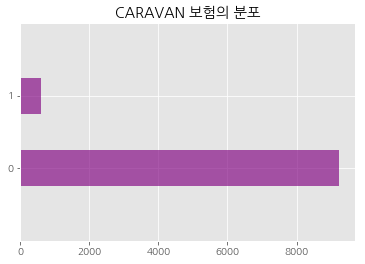

In [167]:
fig,ax= plt.subplots()
ticdata.CARAVAN.value_counts().plot(kind='barh', color="purple", alpha=.65)
ax.set_ylim(-1, len(ticdata.CARAVAN.value_counts())) 
plt.title("CARAVAN 보험의 분포")
print("CARAVAN 반응변수 비율")
print(ticdata.CARAVAN.value_counts())

### 각 변수별 평균  & 표준편차 & 분위수를 시각적으로 확인해보자

In [168]:
continuous_ticdata=ticdata.drop(['MOSTYPE','MOSHOOFD'],1)
stats=continuous_ticdata.describe()

In [169]:
stats = continuous_ticdata.describe()
print(stats) ###변수들 분포 확인

          MAANTHUI      MGEMOMV     MGEMLEEF       MGODRK       MGODPR  \
count  9822.000000  9822.000000  9822.000000  9822.000000  9822.000000   
mean      1.108735     2.677561     2.996437     0.700672     4.637650   
std       0.412101     0.780701     0.804660     1.015107     1.721212   
min       1.000000     1.000000     1.000000     0.000000     0.000000   
25%       1.000000     2.000000     2.000000     0.000000     4.000000   
50%       1.000000     3.000000     3.000000     0.000000     5.000000   
75%       1.000000     3.000000     3.000000     1.000000     6.000000   
max      10.000000     6.000000     6.000000     9.000000     9.000000   

            MGODOV       MGODGE       MRELGE       MRELSA       MRELOV  ...  \
count  9822.000000  9822.000000  9822.000000  9822.000000  9822.000000  ...   
mean      1.050092     3.262981     6.188964     0.873142     2.286602  ...   
std       1.011156     1.606287     1.896070     0.961955     1.710674  ...   
min       0.00000

Text(0.5, 1.0, '변수별 평균그래프')

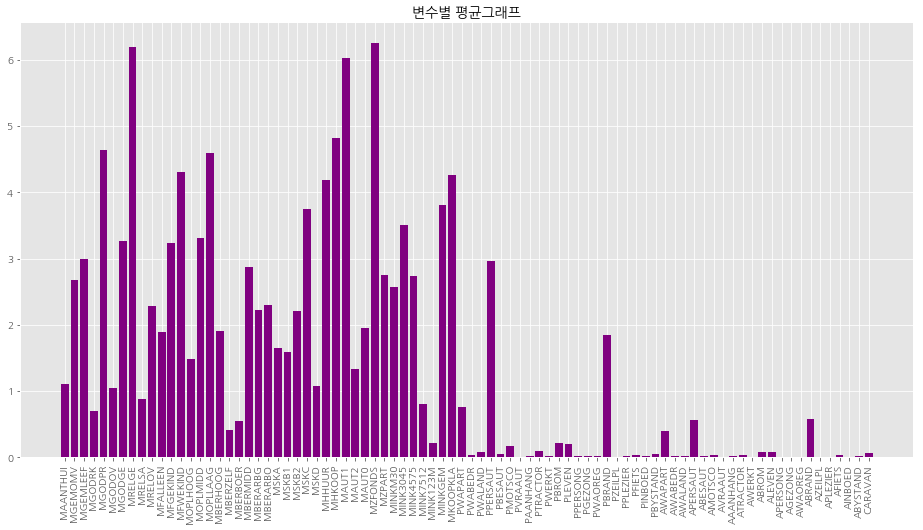

In [170]:
###평균그래프
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
objects = continuous_ticdata.columns
x_pos = np.arange(len(objects))
ax1 = plt.bar(x_pos, stats.loc['mean'],color="purple" ,alpha=1)
plt.xticks(x_pos, objects)
plt.xticks(rotation=90);
plt.title('변수별 평균그래프', size=14)

Text(0.5, 1.0, '변수별 표준편차 그래프')

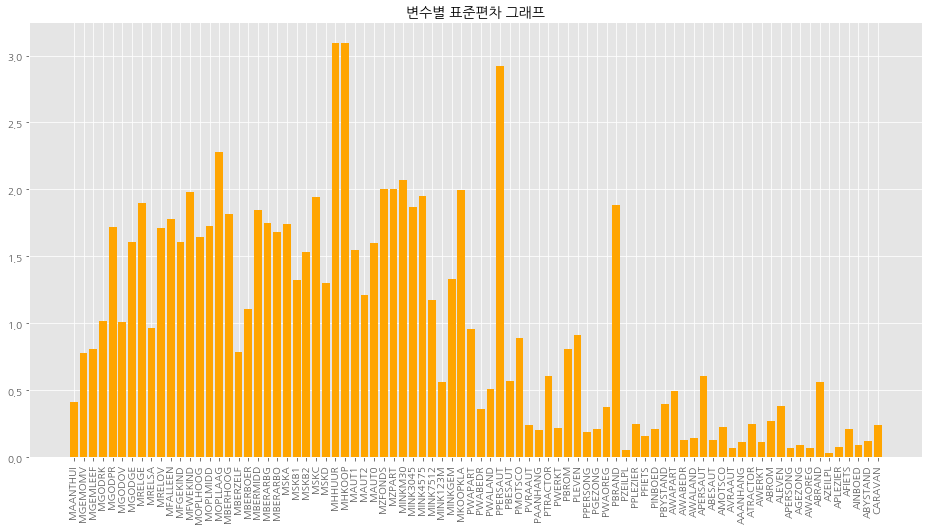

In [171]:
###표준편차 그래프
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
objects = continuous_ticdata.columns
x_pos = np.arange(len(objects))
ax1 = plt.bar(x_pos, stats.loc['std'],color="orange" ,alpha=1)
plt.xticks(x_pos, objects)
plt.xticks(rotation=90);
plt.title('변수별 표준편차 그래프', size=14)

Text(0.5, 1.0, '분위수')

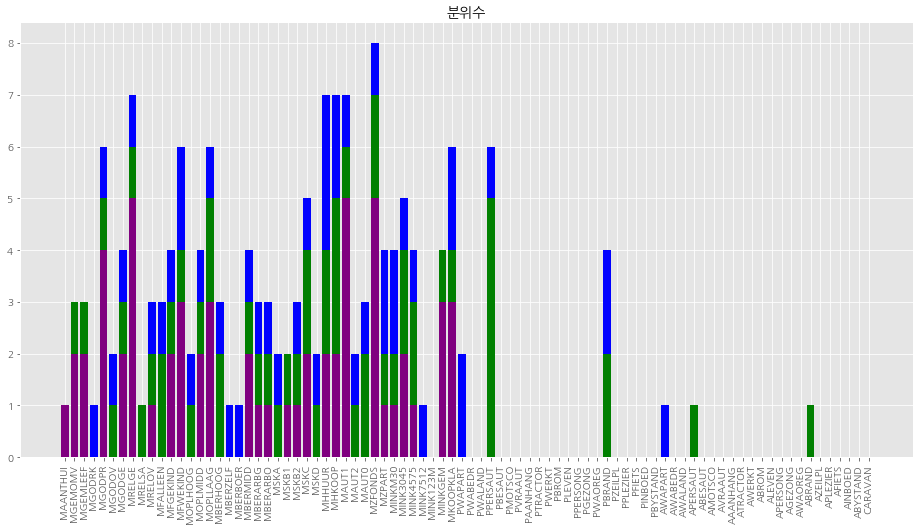

In [172]:
# 분위수 그래프
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
objects = continuous_ticdata.columns
x_pos = np.arange(len(objects))
ax1 = plt.bar(x_pos, stats.loc['75%'],color="blue" ,alpha=1)
ax1 = plt.bar(x_pos, stats.loc['50%'],color="green" ,alpha=1)
ax1 = plt.bar(x_pos, stats.loc['25%'],color="purple" ,alpha=1)
plt.xticks(x_pos, objects)
plt.xticks(rotation=90);
plt.title('분위수', size=14)

### 75th 분위수마저 0인곳이 많다 변수별 0의 개수를 파악해주자

In [173]:
num_zeros = []
for i in range(0, len(ticdata.columns)):
    num_nonzero = len(ticdata.iloc[:,i].nonzero()[0])
    num_zeros.append(ticdata.shape[0] - num_nonzero)

C:\Users\jang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [174]:
num_zeros=pd.Series(num_zeros)
num_zeros.index=ticdata.columns ##개수에 이름을 붙여준다
print(num_zeros)

MOSTYPE        0
MAANTHUI       0
MGEMOMV        0
MGEMLEEF       0
MOSHOOFD       0
MGODRK      5420
MGODPR       127
MGODOV      3460
MGODGE       773
MRELGE       108
MRELSA      4185
MRELOV      1981
MFALLEEN    2916
MFGEKIND     613
MFWEKIND     243
MOPLHOOG    3621
MOPLMIDD     711
MOPLLAAG     494
MBERHOOG    2576
MBERZELF    7031
MBERBOER    6985
MBERMIDD    1164
MBERARBG    1995
MBERARBO    1636
MSKA        2871
MSKB1       2275
MSKB2       1694
MSKC         634
MSKD        4376
MHHUUR      1663
            ... 
PGEZONG     9744
PWAOREG     9784
PBRAND      4464
PZEILPL     9813
PPLEZIER    9777
PFIETS      9573
PINBOED     9740
PBYSTAND    9687
AWAPART     5903
AWABEDR     9688
AWALAND     9613
APERSAUT    4825
ABESAUT     9730
AMOTSCO     9460
AVRAAUT     9808
AAANHANG    9719
ATRACTOR    9576
AWERKT      9790
ABROM       9150
ALEVEN      9308
APERSONG    9777
AGEZONG     9744
AWAOREG     9784
ABRAND      4464
AZEILPL     9813
APLEZIER    9777
AFIETS      9573
AINBOED     97

Text(0.5, 1.0, '변수별 0의 개수')

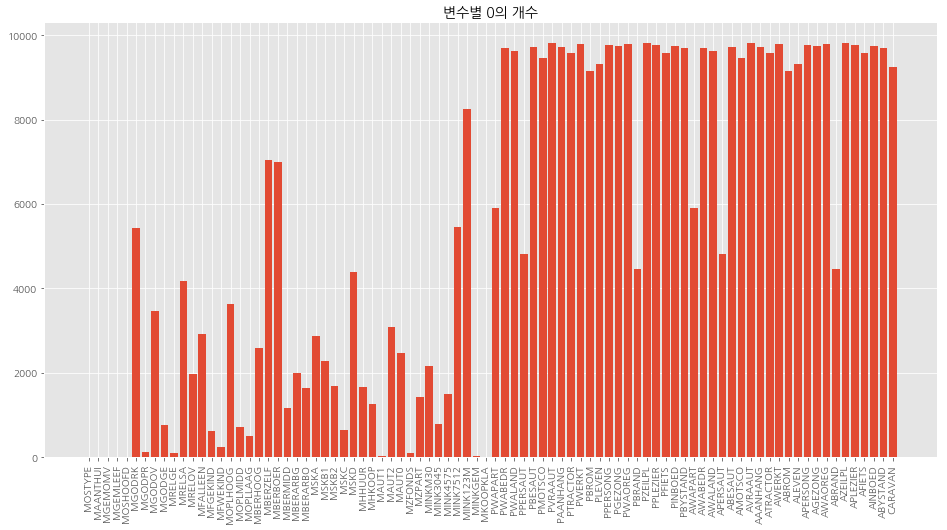

In [175]:
# Plot number of zero values for each feature in order.
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
objects = ticdata.columns
x_pos = np.arange(len(objects))
ax1 = plt.bar(x_pos, num_zeros)
plt.xticks(x_pos, objects)
plt.xticks(rotation=90);
plt.title('변수별 0의 개수', size=14)

### 범주형변수로는 MOSTYPE,MOSHOOFD 가 있다

In [176]:
ticdata["MOSTYPE"]=ticdata["MOSTYPE"].astype('category')

ticdata["MOSHOOFD"]=ticdata["MOSHOOFD"].astype('category')

In [177]:
Mostype_hist=pd.Series(ticdata['MOSTYPE'].value_counts())
Mostype_hist=Mostype_hist.sort_index()
print(Mostype_hist)

1      218
2      148
3      433
4       90
5       70
6      209
7       72
8      546
9      460
10     271
11     286
12     194
13     302
15       7
16      25
17      13
18      27
19       7
20      42
21      29
22     169
23     376
24     324
25     129
26      79
27      77
28      41
29     139
30     190
31     318
32     234
33    1401
34     325
35     362
36     373
37     233
38     569
39     542
40     137
41     355
Name: MOSTYPE, dtype: int64


Text(0.5, 1.0, 'MOSTYPE 히스토그램')

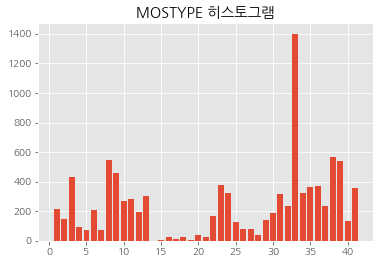

In [178]:
plt.bar(Mostype_hist.index,Mostype_hist)
plt.title("MOSTYPE 히스토그램")

In [179]:
MoshooFD_hist=pd.Series(ticdata['MOSHOOFD'].value_counts())
MoshooFD_hist=MoshooFD_hist.sort_index()
print(MoshooFD_hist)

1      959
2      827
3     1513
4       79
5      940
6      326
7      881
8     2694
9     1111
10     492
Name: MOSHOOFD, dtype: int64


Text(0.5, 1.0, 'MOSHOOFD 히스토그램')

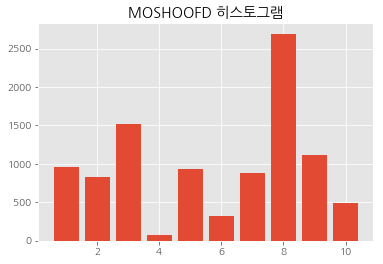

In [180]:
plt.bar(MoshooFD_hist.index,MoshooFD_hist)
plt.title("MOSHOOFD 히스토그램")

### 이상치 탐지 (추후 추가)

In [181]:
stat=ticdata.describe()

In [182]:
stat.loc[['min','max']].T

,min,max
MAANTHUI,1.0,10.0
MGEMOMV,1.0,6.0
MGEMLEEF,1.0,6.0
MGODRK,0.0,9.0
MGODPR,0.0,9.0
MGODOV,0.0,5.0
MGODGE,0.0,9.0
MRELGE,0.0,9.0
MRELSA,0.0,7.0
MRELOV,0.0,9.0


In [183]:
L3columns=ticdata.columns[5:43]

In [184]:
L4columns=ticdata.columns[43:64]

In [185]:
one_to_12columns=ticdata.columns[64:86]

Text(0.5, 1.0, 'MGEMLEEF 범주값 데이터')

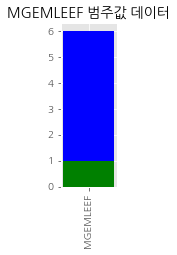

In [186]:
fig = plt.figure(figsize=(1,3))
ax1 = fig.add_subplot(111)
objects = ['MGEMLEEF']
x_pos = np.arange(len(objects))
ax1 = plt.bar(x_pos, stats['MGEMLEEF'].loc['max'],color="blue" ,alpha=1)
ax1 = plt.bar(x_pos, stats['MGEMLEEF'].loc['min'],color="green" ,alpha=1)
plt.xticks(x_pos, objects)
plt.xticks(rotation=90);
plt.yticks(range(7))
plt.title('MGEMLEEF 범주값 데이터', size=14)

Text(0.5, 1.0, 'L3 범주값 데이터')

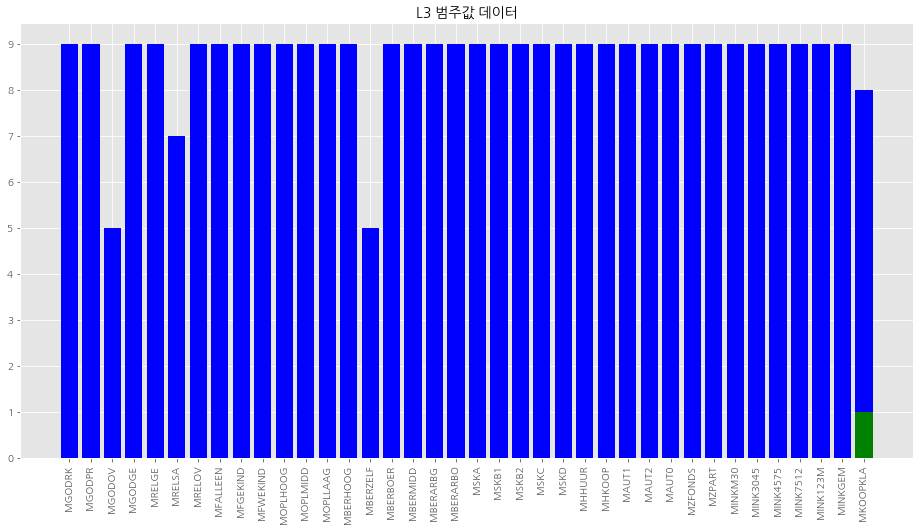

In [187]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
objects = ticdata[L3columns].columns
x_pos = np.arange(len(objects))
ax1 = plt.bar(x_pos, stats[L3columns].loc['max'],color="blue" ,alpha=1)
ax1 = plt.bar(x_pos, stats[L3columns].loc['min'],color="green" ,alpha=1)
plt.xticks(x_pos, objects)
plt.xticks(rotation=90);
plt.yticks(range(10))
plt.title('L3 범주값 데이터', size=14)

Text(0.5, 1.0, 'L4 범주값 데이터')

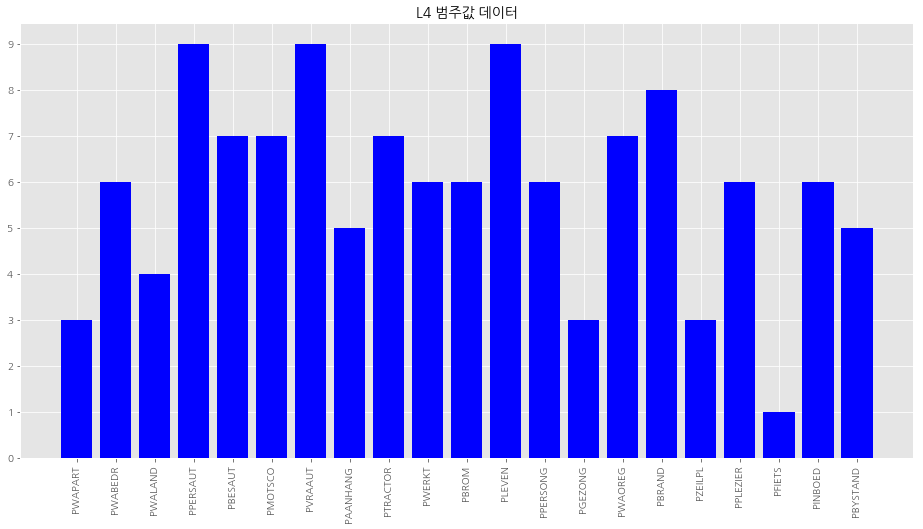

In [188]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
objects = ticdata[L4columns].columns
x_pos = np.arange(len(objects))
ax1 = plt.bar(x_pos, stats[L4columns].loc['max'],color="blue" ,alpha=1)
ax1 = plt.bar(x_pos, stats[L4columns].loc['min'],color="green" ,alpha=1)
plt.xticks(x_pos, objects)
plt.xticks(rotation=90);
plt.yticks(range(10))
plt.title('L4 범주값 데이터', size=14)

Text(0.5, 1.0, '1-12 범주값 데이터')

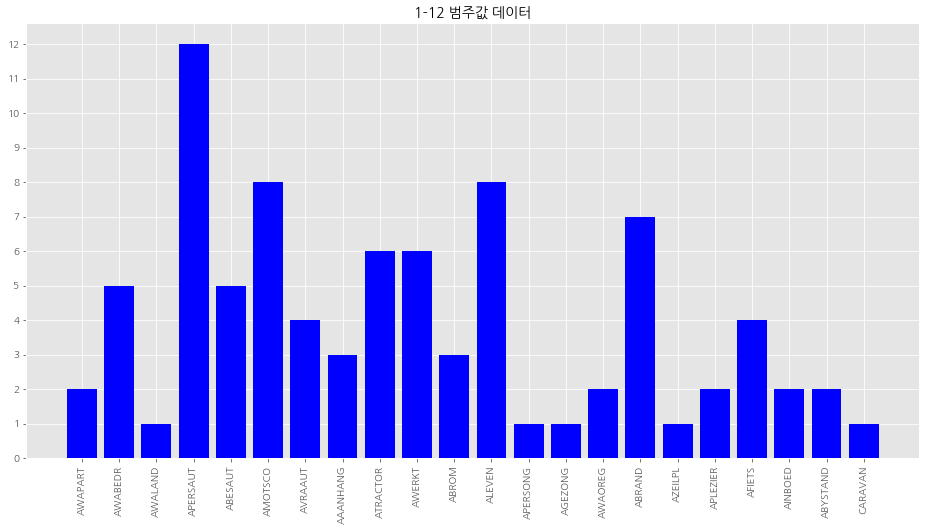

In [189]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
objects = ticdata[one_to_12columns].columns
x_pos = np.arange(len(objects))
ax1 = plt.bar(x_pos, stats[one_to_12columns].loc['max'],color="blue" ,alpha=1)
ax1 = plt.bar(x_pos, stats[one_to_12columns].loc['min'],color="green" ,alpha=1)
plt.xticks(x_pos, objects)
plt.xticks(rotation=90);
plt.yticks(range(13))
plt.title('1-12 범주값 데이터', size=14)

### 구간으로 나타나 있는 변수들은  구간 중간값으로 바꿔준다

In [190]:
###MGMLEEF
ticdata.loc[ticdata['MGEMLEEF']==1,'MGEMLEEF']=25
ticdata.loc[ticdata['MGEMLEEF']==2,'MGEMLEEF']=35
ticdata.loc[ticdata['MGEMLEEF']==3,'MGEMLEEF']=45
ticdata.loc[ticdata['MGEMLEEF']==4,'MGEMLEEF']=55
ticdata.loc[ticdata['MGEMLEEF']==5,'MGEMLEEF']=65
ticdata.loc[ticdata['MGEMLEEF']==6,'MGEMLEEF']=75


In [191]:
###L3 범주값들 정리
for i in ticdata.columns[5:43] :
    ticdata.loc[ticdata.loc[:,i]==0,i]=0
    ticdata.loc[ticdata.loc[:,i]==1,i]=5
    ticdata.loc[ticdata.loc[:,i]==2,i]=17
    ticdata.loc[ticdata.loc[:,i]==3,i]=30
    ticdata.loc[ticdata.loc[:,i]==4,i]=43
    ticdata.loc[ticdata.loc[:,i]==5,i]=56
    ticdata.loc[ticdata.loc[:,i]==6,i]=69
    ticdata.loc[ticdata.loc[:,i]==7,i]=82
    ticdata.loc[ticdata.loc[:,i]==8,i]=95
    ticdata.loc[ticdata.loc[:,i]==9,i]=100


In [192]:
###L4 범주값들 정리
for i in ticdata.columns[43:64] :
    ticdata.loc[ticdata.loc[:,i]==0,i]=0
    ticdata.loc[ticdata.loc[:,i]==1,i]=25
    ticdata.loc[ticdata.loc[:,i]==2,i]=75
    ticdata.loc[ticdata.loc[:,i]==3,i]=150
    ticdata.loc[ticdata.loc[:,i]==4,i]=350
    ticdata.loc[ticdata.loc[:,i]==5,i]=750
    ticdata.loc[ticdata.loc[:,i]==6,i]=3000
    ticdata.loc[ticdata.loc[:,i]==7,i]=7500
    ticdata.loc[ticdata.loc[:,i]==8,i]=15000
    ticdata.loc[ticdata.loc[:,i]==9,i]=20000


### 주요한 변수 후보탐색하기 : 반응변수와의 상관관계 보기 

In [193]:
allticdata=ticdata.copy()

In [194]:
raw_sample=allticdata #### 그래프 그리기용 데이터 새로생성
raw_sample_0=raw_sample[raw_sample['CARAVAN']==0]
raw_sample_1=raw_sample[raw_sample['CARAVAN']==1]

In [195]:
corrdf=raw_sample.corr().stack()['CARAVAN']

In [196]:
np.round(abs(corrdf).sort_values()[::-1],2)

CARAVAN     1.00
PPERSAUT    0.14
APERSAUT    0.13
PWAPART     0.10
MKOOPKLA    0.09
AWAPART     0.09
MINKGEM     0.09
APLEZIER    0.08
MOPLLAAG    0.08
MAUT1       0.07
MAUT0       0.07
MHHUUR      0.07
MRELGE      0.07
MHKOOP      0.06
MZFONDS     0.06
ABRAND      0.06
MINKM30     0.06
PPLEZIER    0.06
MBERBOER    0.06
MRELOV      0.05
PBYSTAND    0.05
ABYSTAND    0.05
PGEZONG     0.05
ALEVEN      0.05
MGEMOMV     0.05
MOPLMIDD    0.04
MOPLHOOG    0.04
AGEZONG     0.04
MINK4575    0.04
MSKC        0.04
            ... 
AAANHANG    0.01
AWERKT      0.01
MRELSA      0.01
ABESAUT     0.01
PBRAND      0.01
PMOTSCO     0.01
MBERARBG    0.01
PBESAUT     0.01
AWAOREG     0.01
PWABEDR     0.01
PWAOREG     0.01
AVRAAUT     0.01
MSKB2       0.01
MAUT2       0.01
PWERKT      0.01
PAANHANG    0.01
PVRAAUT     0.01
PTRACTOR    0.01
PPERSONG    0.01
MSKB1       0.01
MINK3045    0.01
MINK123M    0.00
APERSONG    0.00
MGEMLEEF    0.00
AWABEDR     0.00
PINBOED     0.00
PLEVEN      0.00
MAANTHUI    0.

### PPERSAUT 변수 분석( 차 보험 개수 변수)

Text(0.5, 1.0, 'PPERSAUT 히스토그램')

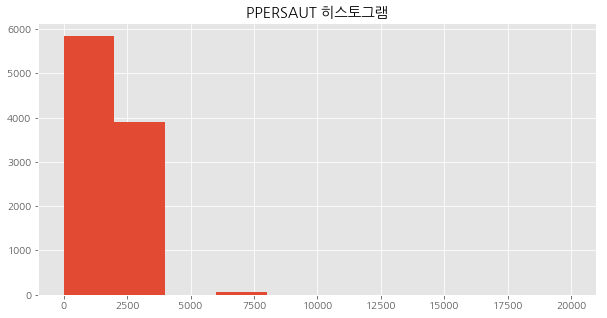

In [197]:
plt.figure(figsize=(10,5))
plt.hist(raw_sample["PPERSAUT"])
plt.title("PPERSAUT 히스토그램")

Text(0.5, 1.0, '반응변수가 1일때 PPERSAUT 의histogram')

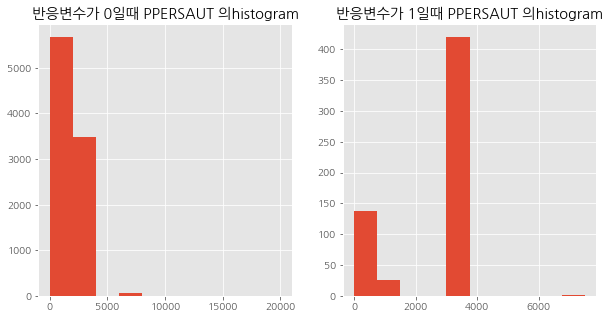

In [198]:
a=plt.figure(figsize=(10,5))
axes1=plt.subplot(1,2,1)
axes1.hist(raw_sample_0["PPERSAUT"])
axes1.set_title("반응변수가 0일때 PPERSAUT 의histogram")
axes2=plt.subplot(1,2,2)
axes2.hist(raw_sample_1["PPERSAUT"])
axes2.set_title("반응변수가 1일때 PPERSAUT 의histogram")

In [199]:
PPERSAUT_table=pd.concat([raw_sample_0['PPERSAUT'].value_counts(),raw_sample_1['PPERSAUT'].value_counts()],1)
PPERSAUT_table.columns=[0,1]
PPERSAUT_table=PPERSAUT_table.fillna(1)
for i in range(PPERSAUT_table.shape[0]):
    print("PPERSAUT의 값이",PPERSAUT_table.index[i],"이",PPERSAUT_table.sum(1).iloc[i],"개 있고",PPERSAUT_table.iloc[i,1]/PPERSAUT_table.iloc[i,0])

PPERSAUT의 값이 0 이 4825.0 개 있고 0.029443140601664176
PPERSAUT의 값이 350 이 5.0 개 있고 0.25
PPERSAUT의 값이 750 이 1013.0 개 있고 0.02634245187436677
PPERSAUT의 값이 3000 이 3910.0 개 있고 0.12034383954154727
PPERSAUT의 값이 7500 이 64.0 개 있고 0.03225806451612903
PPERSAUT의 값이 15000 이 6.0 개 있고 0.2
PPERSAUT의 값이 20000 이 2.0 개 있고 1.0


### APERSAUT 변수 분석( 차 보험 개수 변수)

Text(0.5, 1.0, 'APERSAUT 히스토그램')

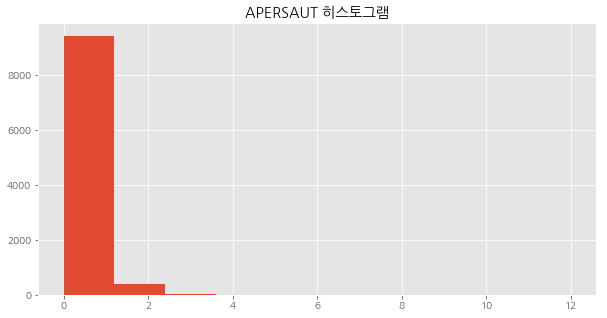

In [200]:
plt.figure(figsize=(10,5))
plt.hist(raw_sample["APERSAUT"])
plt.title("APERSAUT 히스토그램")

Text(0.5, 1.0, '반응변수가 1일때 APERSAUT 의histogram')

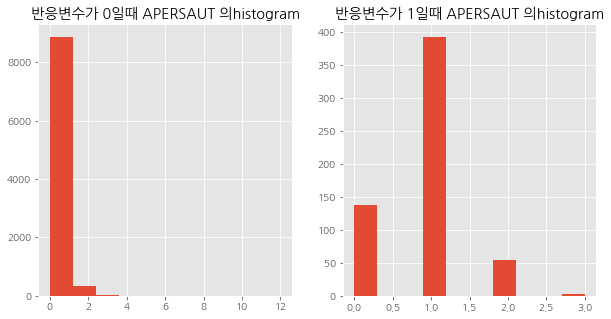

In [201]:
a=plt.figure(figsize=(10,5))
axes1=plt.subplot(1,2,1)
axes1.hist(raw_sample_0["APERSAUT"])
axes1.set_title("반응변수가 0일때 APERSAUT 의histogram")
axes2=plt.subplot(1,2,2)
axes2.hist(raw_sample_1["APERSAUT"])
axes2.set_title("반응변수가 1일때 APERSAUT 의histogram")

In [202]:
APERSAUT_table=pd.concat([raw_sample_0['APERSAUT'].value_counts(),raw_sample_1['APERSAUT'].value_counts()],1)
APERSAUT_table.columns=[0,1]
APERSAUT_table=APERSAUT_table.fillna(1)
for i in range(APERSAUT_table.shape[0]):
    print("APERSAUT의 값",APERSAUT_table.index[i],"이",APERSAUT_table.sum(1).iloc[i],"개 있고",APERSAUT_table.iloc[i,1]/APERSAUT_table.iloc[i,0])

APERSAUT의 값 0 이 4825.0 개 있고 0.029443140601664176
APERSAUT의 값 1 이 4580.0 개 있고 0.0936007640878701
APERSAUT의 값 2 이 384.0 개 있고 0.16363636363636364
APERSAUT의 값 3 이 21.0 개 있고 0.10526315789473684
APERSAUT의 값 4 이 9.0 개 있고 0.125
APERSAUT의 값 5 이 2.0 개 있고 1.0
APERSAUT의 값 6 이 2.0 개 있고 1.0
APERSAUT의 값 7 이 2.0 개 있고 1.0
APERSAUT의 값 12 이 2.0 개 있고 1.0


### PWAPART 변수분석 ()

Text(0.5, 1.0, 'PWAPART 히스토그램')

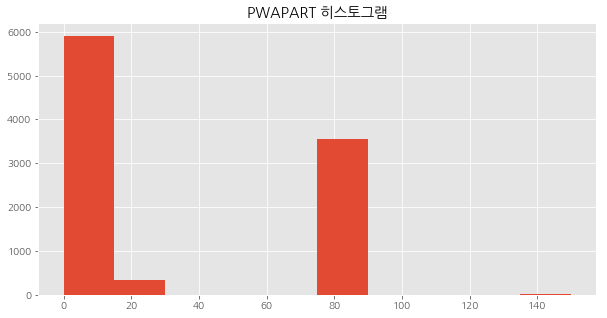

In [203]:
plt.figure(figsize=(10,5))
plt.hist(raw_sample["PWAPART"])
plt.title("PWAPART 히스토그램")

Text(0.5, 1.0, '반응변수가 1일때 PWAPART 의histogram')

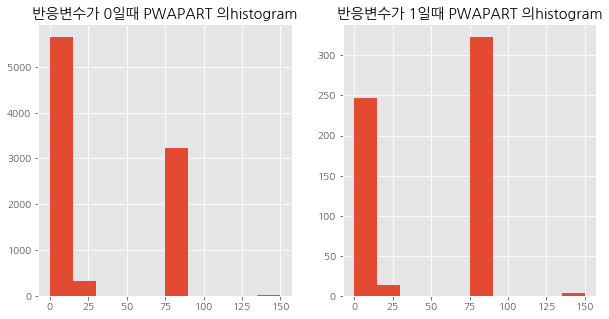

In [204]:
a=plt.figure(figsize=(10,5))
axes1=plt.subplot(1,2,1)
axes1.hist(raw_sample_0["PWAPART"])
axes1.set_title("반응변수가 0일때 PWAPART 의histogram")
axes2=plt.subplot(1,2,2)
axes2.hist(raw_sample_1["PWAPART"])
axes2.set_title("반응변수가 1일때 PWAPART 의histogram")

In [205]:
PWAPART_table=pd.concat([raw_sample_0['PWAPART'].value_counts(),raw_sample_1['PWAPART'].value_counts()],1)
PWAPART_table.columns=[0,1]
PWAPART_table=PWAPART_table.fillna(1)
for i in range(PWAPART_table.shape[0]):
    print("PWAPART의 값",PWAPART_table.index[i],"이",PWAPART_table.sum(1).iloc[i],"개 있고",PWAPART_table.iloc[i,1]/PWAPART_table.iloc[i,0])

PWAPART의 값 0 이 5903 개 있고 0.04367043847241867
PWAPART의 값 25 이 341 개 있고 0.039634146341463415
PWAPART의 값 75 이 3562 개 있고 0.09972213646187095
PWAPART의 값 150 이 16 개 있고 0.23076923076923078


### AWAPART 변수분석

In [206]:
raw_sample["AWAPART"]

0       1
1       1
2       1
3       1
4       1
5       0
6       1
7       1
8       1
9       1
10      0
11      1
12      0
13      1
14      0
15      0
16      1
17      1
18      0
19      0
20      0
21      1
22      0
23      1
24      1
25      1
26      0
27      0
28      0
29      1
       ..
9792    1
9793    0
9794    0
9795    0
9796    0
9797    0
9798    0
9799    1
9800    1
9801    0
9802    0
9803    0
9804    1
9805    0
9806    0
9807    1
9808    1
9809    0
9810    0
9811    0
9812    0
9813    1
9814    1
9815    1
9816    0
9817    1
9818    0
9819    1
9820    0
9821    1
Name: AWAPART, Length: 9822, dtype: int64

(array([5903.,    0.,    0.,    0.,    0., 3909.,    0.,    0.,    0.,
          10.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

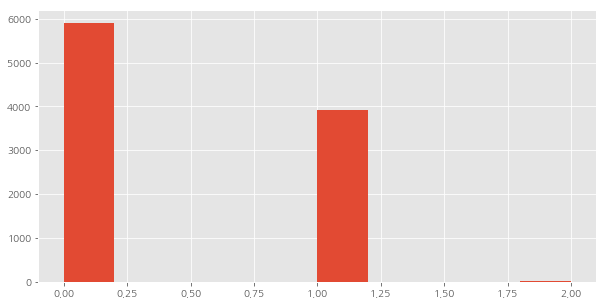

In [207]:
plt.figure(figsize=(10,5))
plt.hist(raw_sample["AWAPART"])

(array([247.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 339.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

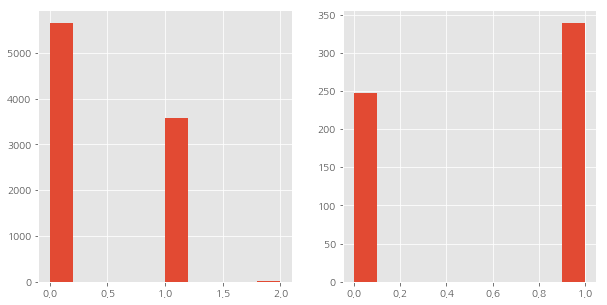

In [208]:
a=plt.figure(figsize=(10,5))
axes1=plt.subplot(1,2,1)
axes1.hist(raw_sample_0["AWAPART"])
axes2=plt.subplot(1,2,2)
axes2.hist(raw_sample_1["AWAPART"])

In [209]:
raw_sample['AWAPART'].unique()

array([1, 0, 2], dtype=int64)

In [210]:
AWAPART_table=pd.concat([raw_sample_0['AWAPART'].value_counts(),raw_sample_1['AWAPART'].value_counts()],1)
AWAPART_table.columns=[0,1]
AWAPART_table=AWAPART_table.fillna(1)
for i in range(AWAPART_table.shape[0]):
    print("AWAPART의 값",AWAPART_table.index[i],"이",AWAPART_table.sum(1).iloc[i],"개 있고",AWAPART_table.iloc[i,1]/AWAPART_table.iloc[i,0])

AWAPART의 값 0 이 5903.0 개 있고 0.04367043847241867
AWAPART의 값 1 이 3909.0 개 있고 0.0949579831932773
AWAPART의 값 2 이 11.0 개 있고 0.1


### MKOOPKLA 변수분석 ()

Text(0.5, 1.0, 'MKOOPKLA 히스토그램')

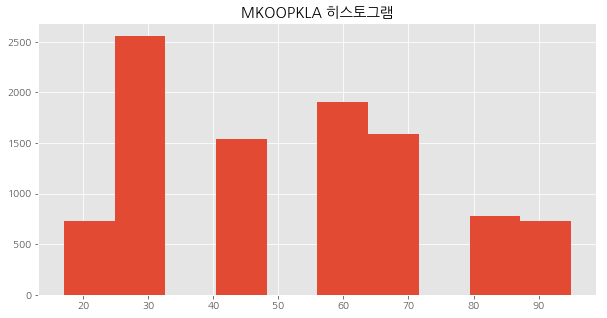

In [211]:
plt.figure(figsize=(10,5))
plt.hist(raw_sample["MKOOPKLA"])
plt.title("MKOOPKLA 히스토그램")

Text(0.5, 1.0, '반응변수가 1일때 MKOOPKLA 의histogram')

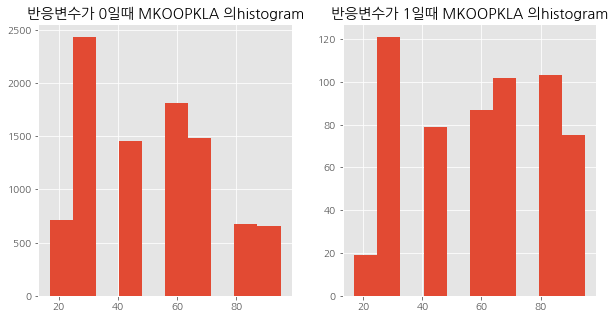

In [212]:
a=plt.figure(figsize=(10,5))
axes1=plt.subplot(1,2,1)
axes1.hist(raw_sample_0["MKOOPKLA"])
axes1.set_title("반응변수가 0일때 MKOOPKLA 의histogram")
axes2=plt.subplot(1,2,2)
axes2.hist(raw_sample_1["MKOOPKLA"])
axes2.set_title("반응변수가 1일때 MKOOPKLA 의histogram")

In [213]:
MKOOPKLA_table=pd.concat([raw_sample_0['MKOOPKLA'].value_counts(),raw_sample_1['MKOOPKLA'].value_counts()],1)
MKOOPKLA_table.columns=[0,1]
MKOOPKLA_table=MKOOPKLA_table.fillna(1)
for i in range(MKOOPKLA_table.shape[0]):
    print("MKOOPKLA의 값",MKOOPKLA_table.index[i],"이",MKOOPKLA_table.sum(1).iloc[i],"개 있고",MKOOPKLA_table.iloc[i,1]/MKOOPKLA_table.iloc[i,0])

MKOOPKLA의 값 17 이 731 개 있고 0.026685393258426966
MKOOPKLA의 값 30 이 2556 개 있고 0.04969199178644764
MKOOPKLA의 값 43 이 1539 개 있고 0.05410958904109589
MKOOPKLA의 값 56 이 1902 개 있고 0.047933884297520664
MKOOPKLA의 값 69 이 1587 개 있고 0.06868686868686869
MKOOPKLA의 값 82 이 777 개 있고 0.15281899109792285
MKOOPKLA의 값 95 이 730 개 있고 0.11450381679389313


### MAUT1 변수 분석 ()

Text(0.5, 1.0, 'MAUT1 히스토그램')

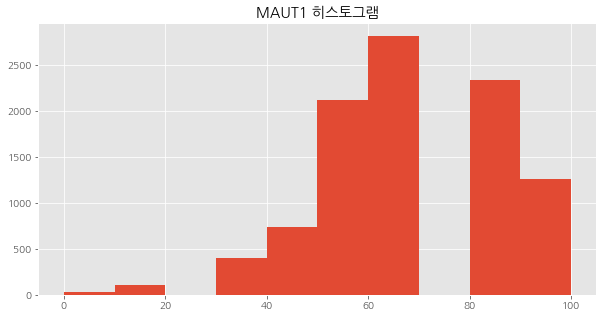

In [214]:
plt.figure(figsize=(10,5))
plt.hist(raw_sample["MAUT1"])
plt.title("MAUT1 히스토그램")

Text(0.5, 1.0, '반응변수가 1일때 MAUT1 의histogram')

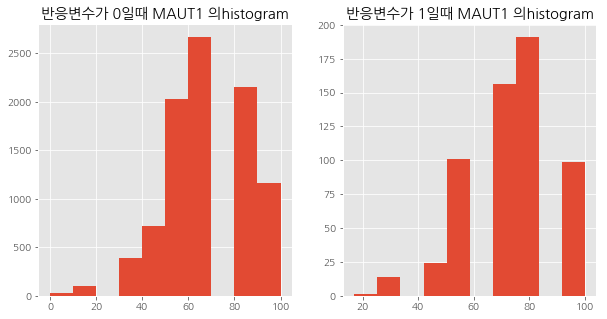

In [215]:
a=plt.figure(figsize=(10,5))
axes1=plt.subplot(1,2,1)
axes1.hist(raw_sample_0["MAUT1"])
axes1.set_title("반응변수가 0일때 MAUT1 의histogram")
axes2=plt.subplot(1,2,2)
axes2.hist(raw_sample_1["MAUT1"])
axes2.set_title("반응변수가 1일때 MAUT1 의histogram")

In [216]:
MAUT1_table=pd.concat([raw_sample_0['MAUT1'].value_counts(),raw_sample_1['MAUT1'].value_counts()],1)
MAUT1_table.columns=[0,1]
MAUT1_table=MAUT1_table.fillna(1)
for i in range(MAUT1_table.shape[0]):
    print("MAUT1의 값",MAUT1_table.index[i],"이",MAUT1_table.sum(1).iloc[i],"개 있고",MAUT1_table.iloc[i,1]/MAUT1_table.iloc[i,0])

MAUT1의 값 0 이 31.0 개 있고 0.03333333333333333
MAUT1의 값 17 이 102.0 개 있고 0.009900990099009901
MAUT1의 값 30 이 400.0 개 있고 0.03626943005181347
MAUT1의 값 43 이 740.0 개 있고 0.0335195530726257
MAUT1의 값 56 이 2126.0 개 있고 0.04987654320987654
MAUT1의 값 69 이 2822.0 개 있고 0.058514628657164294
MAUT1의 값 82 이 2338.0 개 있고 0.08896134140661388
MAUT1의 값 95 이 435.0 개 있고 0.06356968215158924
MAUT1의 값 100 이 829.0 개 있고 0.09656084656084656


### MRELGE 변수 분석 ()

Text(0.5, 1.0, 'MRELGE 히스토그램')

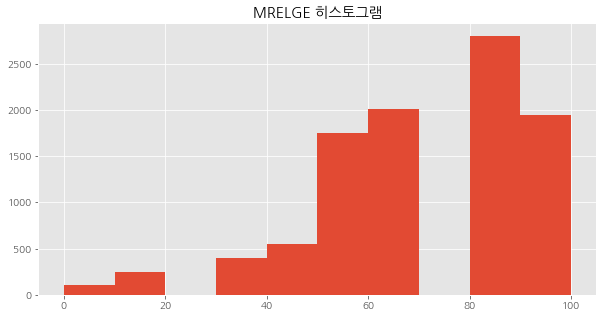

In [217]:
plt.figure(figsize=(10,5))
plt.hist(raw_sample["MRELGE"])
plt.title("MRELGE 히스토그램")

Text(0.5, 1.0, '반응변수가 1일때 MRELGE 의histogram')

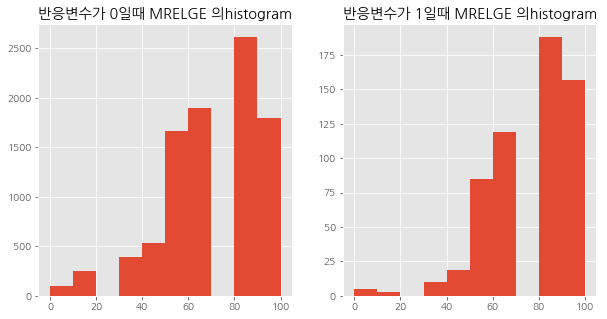

In [218]:
a=plt.figure(figsize=(10,5))
axes1=plt.subplot(1,2,1)
axes1.hist(raw_sample_0["MRELGE"])
axes1.set_title("반응변수가 0일때 MRELGE 의histogram")
axes2=plt.subplot(1,2,2)
axes2.hist(raw_sample_1["MRELGE"])
axes2.set_title("반응변수가 1일때 MRELGE 의histogram")

In [219]:
MRELGE_table=pd.concat([raw_sample_0['MRELGE'].value_counts(),raw_sample_1['MRELGE'].value_counts()],1)
MRELGE_table.columns=[0,1]
MRELGE_table=MRELGE_table.fillna(1)
for i in range(MRELGE_table.shape[0]):
    print("MRELGE의 값",MRELGE_table.index[i],"이",MRELGE_table.sum(1).iloc[i],"개 있고",MRELGE_table.iloc[i,1]/MRELGE_table.iloc[i,0])

MRELGE의 값 0 이 108 개 있고 0.04854368932038835
MRELGE의 값 17 이 252 개 있고 0.012048192771084338
MRELGE의 값 30 이 402 개 있고 0.025510204081632654
MRELGE의 값 43 이 550 개 있고 0.035781544256120526
MRELGE의 값 56 이 1747 개 있고 0.05114320096269555
MRELGE의 값 69 이 2015 개 있고 0.06276371308016877
MRELGE의 값 82 이 2800 개 있고 0.07197549770290965
MRELGE의 값 95 이 603 개 있고 0.08064516129032258
MRELGE의 값 100 이 1345 개 있고 0.0908353609083536


### MINKGEM 변수 분석 ()

Text(0.5, 1.0, 'MINKGEM 히스토그램')

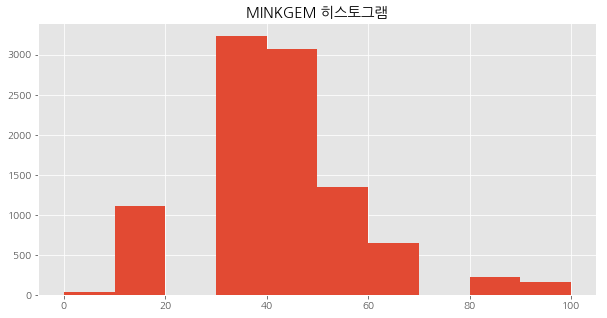

In [220]:
plt.figure(figsize=(10,5))
plt.hist(raw_sample["MINKGEM"])
plt.title("MINKGEM 히스토그램")

Text(0.5, 1.0, '반응변수가 1일때 MINKGEM 의histogram')

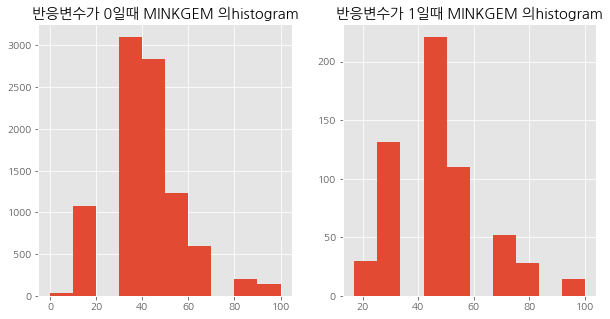

In [221]:
a=plt.figure(figsize=(10,5))
axes1=plt.subplot(1,2,1)
axes1.hist(raw_sample_0["MINKGEM"])
axes1.set_title("반응변수가 0일때 MINKGEM 의histogram")
axes2=plt.subplot(1,2,2)
axes2.hist(raw_sample_1["MINKGEM"])
axes2.set_title("반응변수가 1일때 MINKGEM 의histogram")

In [222]:
MINKGEM_table=pd.concat([raw_sample_0['MINKGEM'].value_counts(),raw_sample_1['MINKGEM'].value_counts()],1)
MINKGEM_table.columns=[0,1]
MINKGEM_table=MINKGEM_table.fillna(1)
for i in range(MINKGEM_table.shape[0]):
    print("MINKGEM의 값",MINKGEM_table.index[i],"이",MINKGEM_table.sum(1).iloc[i],"개 있고",MINKGEM_table.iloc[i,1]/MINKGEM_table.iloc[i,0])

MINKGEM의 값 0 이 39.0 개 있고 0.02631578947368421
MINKGEM의 값 17 이 1110.0 개 있고 0.027777777777777776
MINKGEM의 값 30 이 3232.0 개 있고 0.042244437278297325
MINKGEM의 값 43 이 3063.0 개 있고 0.07776213933849402
MINKGEM의 값 56 이 1346.0 개 있고 0.0889967637540453
MINKGEM의 값 69 이 646.0 개 있고 0.08754208754208755
MINKGEM의 값 82 이 228.0 개 있고 0.14
MINKGEM의 값 95 이 121.0 개 있고 0.11009174311926606
MINKGEM의 값 100 이 38.0 개 있고 0.05555555555555555


### PBRAND 변수 분석 (화재 보험금 변수)

Text(0.5, 1.0, 'PBRAND 히스토그램')

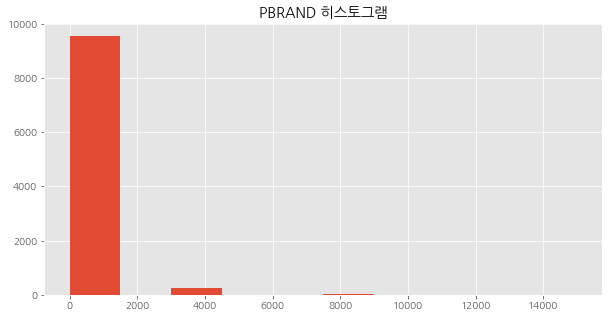

In [223]:
plt.figure(figsize=(10,5))
plt.hist(raw_sample["PBRAND"])
plt.title("PBRAND 히스토그램")

Text(0.5, 1.0, '반응변수가 1일때 PBRAND 의histogram')

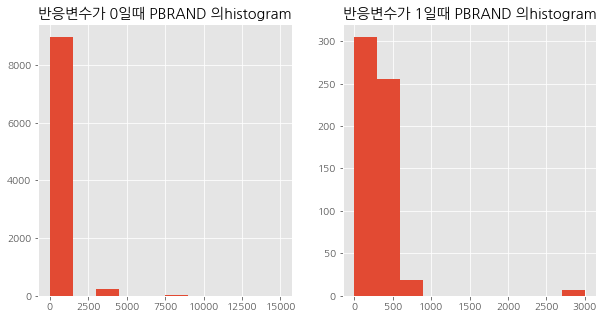

In [224]:
a=plt.figure(figsize=(10,5))
axes1=plt.subplot(1,2,1)
axes1.hist(raw_sample_0["PBRAND"])
axes1.set_title("반응변수가 0일때 PBRAND 의histogram")
axes2=plt.subplot(1,2,2)
axes2.hist(raw_sample_1["PBRAND"])
axes2.set_title("반응변수가 1일때 PBRAND 의histogram")

In [225]:
PBRAND_table=pd.concat([raw_sample_0['PBRAND'].value_counts(),raw_sample_1['PBRAND'].value_counts()],1)
PBRAND_table.columns=[0,1]
PBRAND_table=PBRAND_table.fillna(1)
for i in range(PBRAND_table.shape[0]):
    print("PBRAND의 값",PBRAND_table.index[i],"이",PBRAND_table.sum(1).iloc[i],"개 있고",PBRAND_table.iloc[i,1]/PBRAND_table.iloc[i,0])

PBRAND의 값 0 이 4464.0 개 있고 0.042260098062106004
PBRAND의 값 25 이 245.0 개 있고 0.012396694214876033
PBRAND의 값 75 이 901.0 개 있고 0.01807909604519774
PBRAND의 값 150 이 1541.0 개 있고 0.07311977715877438
PBRAND의 값 350 이 2142.0 개 있고 0.13513513513513514
PBRAND의 값 750 이 263.0 개 있고 0.0778688524590164
PBRAND의 값 3000 이 252.0 개 있고 0.02857142857142857
PBRAND의 값 7500 이 13.0 개 있고 0.08333333333333333
PBRAND의 값 15000 이 3.0 개 있고 0.5


##### 반응변수와의 직접적인 상관관계를 보았을때  자동차보험 비용,자동차 보험개수, 제 3자 보험 비용, 제 3자 보험 개수, 구매력 , 차 소유 여부, 화재 보험 가입여부 등이 유의한 상관관계를 가졌으리라 유추할 수 있다.  하지만 동시에 유의한 변수들 사이에 공통요인이 보이는 만큼 (차 소유여부, 구매력등) 상관관계가 많으리라 유추해 볼 수 있으므로 최대한 중요한 변수들의 정보를 잃지않으면서 변수간의 공분산은 최소화 하는 변수선택을 할 필요가 있다

### 서로 연관되는 변수들 (합이 100이 되는 변수들) 을 PCA 를 통해 합쳐줌 

In [226]:
allticdata=ticdata.copy()


from sklearn.decomposition import PCA
doPCA=True
if doPCA:
    
    pca=PCA(n_components=2)
    pca.fit(allticdata.iloc[:,[15,16,17]])
    print("[[[Edu]]]")
    print("Edu 주성분 분산 설명량")
    print(np.round(pca.explained_variance_ratio_,2))
    print("Edu 주성분 계수")
    print(np.round(pca.components_,2)) ####교육수준 하위와 중위,고위와의 대비,##교육수준 상위와 중위 하위와의 대비
    education=pca.transform(allticdata.iloc[:,[15,16,17]]) 
    education=pd.DataFrame(education)
    education.columns=["education1","education2"]

    #####종교 pca

    religion_pca=PCA(n_components=2)
    religion_pca.fit(allticdata.iloc[:,5:9])
    print("[[[religion]]]")
    print("religion 주성분 분산 설명량")
    print(np.round(religion_pca.explained_variance_ratio_,2))#####개신교와 다른 종교와의 대비 ###종교없는 사람과 종교있는사람들의 대비
    print("religion 주성분 계수")
    print(np.round(religion_pca.components_,2))
    religion=religion_pca.transform(allticdata.iloc[:,[5,6,7,8]])
    religion=pd.DataFrame(religion)
    religion.columns=["religion1","religion2"]

    ####married 10~12

    married_pca=PCA(n_components=2)
    married_pca.fit(allticdata.iloc[:,9:12])
    print("[[[married]]]")
    print("married 주성분 분산 설명량")
    print(np.round(married_pca.explained_variance_ratio_,2)) ###결혼한사람과 결혼하지 않은사람과의 대비
    print("married 주성분 계수")
    print(np.round(married_pca.components_,2))
    married=married_pca.transform(allticdata.iloc[:,[9,10,11]])
    married=pd.DataFrame(married)
    married.columns=["married1","married2"]

    ###single pca 13~15

    single_pca=PCA(n_components=2)
    single_pca.fit(allticdata.iloc[:,12:15])
    print("[[[single]]]")
    print("single 주성분 분산 설명량")
    print(np.round(single_pca.explained_variance_ratio_)) ###혼자사는집과 자식들이 있는집과의 대비
    print("single 주성분 계수")
    print(np.round(single_pca.components_,2))
    single=single_pca.transform(allticdata.iloc[:,[12,13,14]])
    single=pd.DataFrame(single)
    single.columns=["single1","single2"]

    ######job pca(19~24)

    job_pca=PCA(n_components=4)
    job_pca.fit(allticdata.iloc[:,18:24])
    print("job")
    print(job_pca.explained_variance_ratio_)
    print(job_pca.components_) ### 고위, 중간직 사람이랑 노동자의 대비 , 중간직과 고위직의 대비, 노동자내의 대비
    job=job_pca.transform(allticdata.iloc[:,18:24])

    job=pd.DataFrame(job)

    job.columns=["job_1","job_2","job_3","job_4"]

    ######사회계급 pca 25~29
    ###zip code 

    rank_pca=PCA(n_components=3)
    rank_pca.fit(allticdata.iloc[:,24:29])
    print("rank")
    print(rank_pca.explained_variance_ratio_)
    print(rank_pca.components_)  #CLASS C이상이냐 이하냐의 변수,클래스 C 이상에서과 CLASS B와  A의 대비
    rank=rank_pca.transform(allticdata.iloc[:,24:29])
    rank=pd.DataFrame(rank)
    rank.columns=["rank_1","rank_2","rank_3"]

    ### RENT HOUSE PCA 30~31

    rent_pca=PCA(n_components=1)
    rent_pca.fit(allticdata.iloc[:,29:31])
    print("[[[rent]]]")
    print("rent 주성분 분산 설명량")
    print(np.round(rent_pca.explained_variance_ratio_,2))
    print("rent 주성분 계수")
    print(np.round(rent_pca.components_,2))  ###renthouse와 house owener사이의 대비
    rent=rent_pca.transform(allticdata.iloc[:,29:31])
    rent=pd.DataFrame(rent)
    rent.columns=["rent1"]

    #### number of cars 32~34

    cars_pca=PCA(n_components=2)
    cars_pca.fit(allticdata.iloc[:,31:34])
    print("[[[cars]]]")
    print("car 주성분 분산 설명량")
    print(np.round(cars_pca.explained_variance_ratio_,2))
    print("car 주성분 계수")
    print(np.round(cars_pca.components_,2))  ###차가 있는것과 없는것의 대비, 차가 여러대있거나 0개나 1개인 사람들
    cars=cars_pca.transform(allticdata.iloc[:,31:34])
    cars=pd.DataFrame(cars)
    cars.columns=["cars_1","cars_2"]

    ###### 국민 건강 보험vs 사립건강보험 pca 35~36

    insurance_pca=PCA(n_components=1)
    insurance_pca.fit(allticdata.iloc[:,34:36])
    print("[[[insurance]]]")
    print(np.round(insurance_pca.explained_variance_ratio_,2))
    print(np.round(insurance_pca.components_,2)) ####사립보험과 건강보험의 대비가 99%
    insurance=insurance_pca.transform(allticdata.iloc[:,34:36])
    insurance=pd.DataFrame(insurance)
    insurance.columns=["insurance"]

    #####수입 pca 37~41
    income_pca=PCA(n_components=3)
    income_pca.fit(allticdata.iloc[:,36:41])
    print("수입")
    print(income_pca.explained_variance_ratio_)
    print(income_pca.components_) ### 중산층과 저수입자들의 대비 , 저수입자들중에서 30000달러도 안되는사람과 30000달러는넘는사람들의 대비
    income=income_pca.transform(allticdata.iloc[:,36:41])

    income=pd.DataFrame(income)

    income.columns=["income_1","income_2","income_3"]
    ### 지역 pca 를 통해 전체변수의 개수를 86개-> 65개로 줄여줌

    del_columns=allticdata.columns[5:41]
    
    newticdata= allticdata.drop(del_columns, 1)
    newticdata=pd.concat([newticdata,education,religion,married,single,rent,cars,insurance,income,job,rank],1)
    
    print(newticdata.columns) 
    print(newticdata.shape)
    ticdata=newticdata

    

[[[Edu]]]
Edu 주성분 분산 설명량
[0.58 0.31]
Edu 주성분 계수
[[ 0.46  0.42 -0.78]
 [ 0.84 -0.48  0.25]]
[[[religion]]]
religion 주성분 분산 설명량
[0.43 0.29]
religion 주성분 계수
[[ 0.66 -0.43  0.55  0.27]
 [-0.3  -0.58 -0.41  0.63]]
[[[married]]]
married 주성분 분산 설명량
[0.53 0.37]
married 주성분 계수
[[-0.63  0.49  0.6 ]
 [-0.35 -0.87  0.34]]
[[[single]]]
single 주성분 분산 설명량
[0. 0.]
single 주성분 계수
[[ 0.58  0.3  -0.76]
 [ 0.73 -0.6   0.33]]
job
[0.22626969 0.19353952 0.17167808 0.16047774]
[[ 0.66092412  0.52557248  0.44536847 -0.18635891 -0.2307893   0.0246264 ]
 [-0.47031279  0.36894209  0.35651519 -0.46095187  0.54866256 -0.0455775 ]
 [-0.40884887  0.46918509  0.18445234  0.6262075  -0.28656277 -0.32315823]
 [-0.36814884  0.00079291  0.19306448 -0.13385575 -0.49142416  0.75350968]]
rank
[0.28558312 0.23535335 0.19953239]
[[ 0.79203099  0.19834751  0.11335954 -0.53169297  0.19441548]
 [-0.0776944   0.25697902  0.02815417  0.31840433  0.90870864]
 [-0.37514195  0.6838593   0.55473915 -0.24303018 -0.15749853]]
[[[rent]]]


### 표준화

In [227]:
a=list(ticdata.columns)
a.remove('CARAVAN')
a.remove('MOSTYPE')
a.remove('MOSHOOFD')

In [228]:
ticdata_continuous=ticdata[a]

In [229]:
stat=ticdata.describe()
print(stat)

          MAANTHUI      MGEMOMV     MGEMLEEF      MINKGEM     MKOOPKLA  \
count  9822.000000  9822.000000  9822.000000  9822.000000  9822.000000   
mean      1.108735     2.677561    44.964366    40.875585    51.350336   
std       0.412101     0.780701     8.046598    16.837012    22.087471   
min       1.000000     1.000000    25.000000     0.000000    17.000000   
25%       1.000000     2.000000    35.000000    30.000000    30.000000   
50%       1.000000     3.000000    45.000000    43.000000    56.000000   
75%       1.000000     3.000000    45.000000    43.000000    69.000000   
max      10.000000     6.000000    75.000000   100.000000    95.000000   

           PWAPART      PWABEDR      PWALAND      PPERSAUT      PBESAUT  ...  \
count  9822.000000  9822.000000  9822.000000   9822.000000  9822.000000  ...   
mean     28.311444     3.812869     5.312055   1330.294237    26.038485  ...   
std      36.012237    72.743143    39.163783   1546.992525   297.103273  ...   
min       0.0

Text(0.5, 1.0, 'Min Max Scaler 이전')

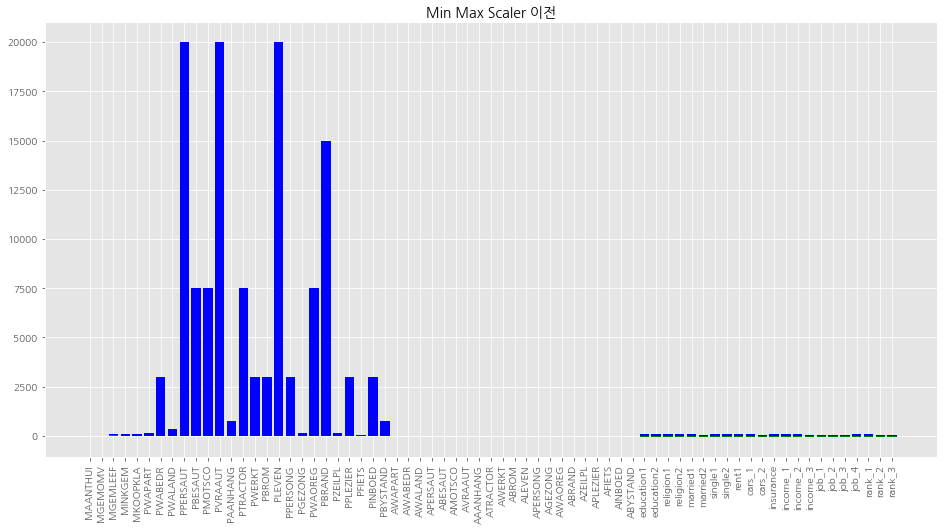

In [230]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
objects = ticdata[a].columns
x_pos = np.arange(len(objects))
ax1 = plt.bar(x_pos, stat[a].loc['max'],color="blue" ,alpha=1)
ax1 = plt.bar(x_pos, stat[a].loc['min'],color="green" ,alpha=1)
plt.xticks(x_pos, objects)
plt.xticks(rotation=90);
plt.title('Min Max Scaler 이전', size=14)

In [231]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(ticdata_continuous)
ticdata[a]=scaler.transform(ticdata_continuous)

C:\Users\jang\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [232]:
stat=ticdata.describe()
print(stat)

          MAANTHUI      MGEMOMV     MGEMLEEF      MINKGEM     MKOOPKLA  \
count  9822.000000  9822.000000  9822.000000  9822.000000  9822.000000   
mean      0.012082     0.335512     0.399287     0.408756     0.440389   
std       0.045789     0.156140     0.160932     0.168370     0.283173   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.200000     0.200000     0.300000     0.166667   
50%       0.000000     0.400000     0.400000     0.430000     0.500000   
75%       0.000000     0.400000     0.400000     0.430000     0.666667   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           PWAPART      PWABEDR      PWALAND     PPERSAUT      PBESAUT  ...  \
count  9822.000000  9822.000000  9822.000000  9822.000000  9822.000000  ...   
mean      0.188743     0.001271     0.015177     0.066515     0.003472  ...   
std       0.240082     0.024248     0.111897     0.077350     0.039614  ...   
min       0.00000

Text(0.5, 1.0, 'Min Max Scaler 이후')

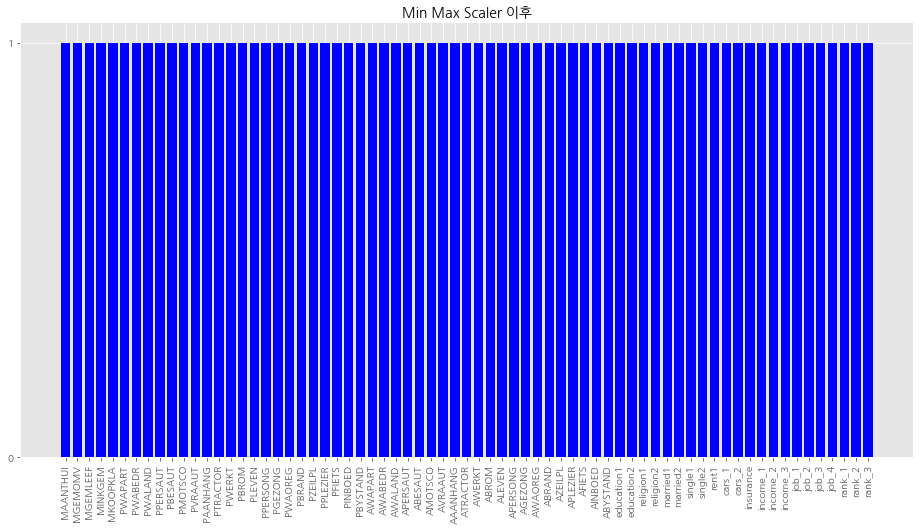

In [233]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
objects = ticdata[a].columns
x_pos = np.arange(len(objects))
ax1 = plt.bar(x_pos, stat[a].loc['max'],color="blue" ,alpha=1)
ax1 = plt.bar(x_pos, stat[a].loc['min'],color="green" ,alpha=1)
plt.xticks(x_pos, objects)
plt.xticks(rotation=90);
plt.yticks(range(2))
plt.title('Min Max Scaler 이후', size=14)

## 반응변수의 비율 확인

In [234]:
ticdata['CARAVAN'].value_counts() #### 0과 1의 비율 확인 둘의 비율이 같지 않으므로 더 작은 1인값들에 대해서 비율을 맞춰줌

0    9236
1     586
Name: CARAVAN, dtype: int64

### 최종 데이터생성 & sample weight값 계산

In [235]:
ticdata_1=ticdata.loc[ticdata['CARAVAN']==1]###반응변수가 1인값들만 따로 뽑아준다
ticdata_0=ticdata.loc[ticdata['CARAVAN']==0]###반응변수가 0인값들만 따로 뽑아준다.
ticdata_0_sample=ticdata_0.sample(586,random_state=13) ####9236개의 반응변수가 0인 관측값들중 586개를 샘플링 했다.
ticdata=pd.concat([ticdata_0_sample,ticdata_1],axis=0) ### 0:586개 1:586개인 데이터를 합쳐줌
ticdata=ticdata.sort_index() ###다시 index 별로 정렬해주기
ticdata.shape

(1172, 72)

CARAVAN 반응변수 비율
1    586
0    586
Name: CARAVAN, dtype: int64


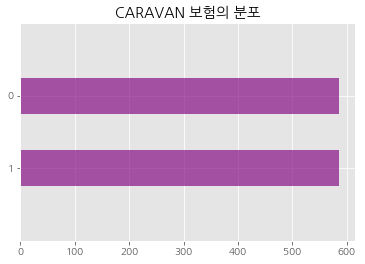

In [236]:
fig,ax= plt.subplots()
ticdata.CARAVAN.value_counts().plot(kind='barh', color="purple", alpha=.65)
ax.set_ylim(-1, len(ticdata.CARAVAN.value_counts())) 
plt.title("CARAVAN 보험의 분포")
print("CARAVAN 반응변수 비율")
print(ticdata.CARAVAN.value_counts())

In [237]:
sampleweight_0=allticdata['CARAVAN'].value_counts()[0]/sum(ticdata.CARAVAN==0)
sampleweight_1=allticdata['CARAVAN'].value_counts()[1]/sum(ticdata.CARAVAN==1)
print(sampleweight_0) ###반응변수가 0인것의 sample weight
print(sampleweight_1) ###반응변수가 1인것의 sample weight

15.761092150170649
1.0


In [238]:
weight_dict={0:sampleweight_0,1:sampleweight_1} ##sample weight dictionary 생성

### 범주형 변수들 dummy variable 만들어주기

#### Mostype 은 MOSHOOFD가 세분화 된것이다. MOSTYPE 는 변수가 너무 세분화 되어있고 값이 적은 범주들이 너무 많다. 그러므로 MOSTYPE을 제거하고 MOSHOOFD만 남겨서 더미변수들로 만들어준다

In [239]:
Dummies=True
if Dummies:
    ##Dummy_MOSTYPE=pd.get_dummies(ticdata['MOSTYPE'],prefix="MOSTYPE")
    Dummy_MOSHOOFD=pd.get_dummies(ticdata['MOSHOOFD'],prefix="MOSHOOFD")
    ticdata=pd.concat([ticdata,Dummy_MOSHOOFD],1)
    ##ticdata=pd.concat([ticdata,Dummy_MOSTYPE],1)
    ticdata=ticdata.drop(['MOSTYPE'],1)
    ticdata=ticdata.drop(['MOSHOOFD'],1)
    print(ticdata.shape)


(1172, 80)


In [240]:
ticdata.columns

Index(['MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MINKGEM', 'MKOOPKLA', 'PWAPART',
       'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT',
       'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG',
       'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS',
       'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT',
       'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT',
       'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND',
       'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND', 'CARAVAN',
       'education1', 'education2', 'religion1', 'religion2', 'married1',
       'married2', 'single1', 'single2', 'rent1', 'cars_1', 'cars_2',
       'insurance', 'income_1', 'income_2', 'income_3', 'job_1', 'job_2',
       'job_3', 'job_4', 'rank_1', 'rank_2', 'rank_3', 'MOSHOOFD_1',
       'MOSHOOFD_2', 'MOSHOOFD_3', 'MOSHOOFD_4', 'MOSHOOFD_5', 'MOSHOOFD_6',
       'MOSHOOFD_7', 'MOSHOOFD_8', 'MOSHOOFD_9', '

# 1. 변수선택

#### 상관관계 그래프 

In [241]:
numerical_columns=[name for name in list(ticdata.columns) if name not in ['CARAVAN']]

correlation_df=ticdata[numerical_columns].corr()
correlated_pairs=list(correlation_df[abs(correlation_df)>0.7].stack().index)
correlated_pairs=[ pair for pair in correlated_pairs if (pair[0]!=pair[1])]
print("상관관계가 0.7보다 큰 쌍이",np.int(len(set(correlated_pairs))/2),"쌍이 있다")

상관관계가 0.7보다 큰 쌍이 21 쌍이 있다


In [242]:
correlated_pairs

[('MGEMOMV', 'single1'),
 ('PWAPART', 'AWAPART'),
 ('PWABEDR', 'PVRAAUT'),
 ('PWABEDR', 'AWABEDR'),
 ('PWABEDR', 'AVRAAUT'),
 ('PWALAND', 'AWALAND'),
 ('PPERSAUT', 'APERSAUT'),
 ('PBESAUT', 'ABESAUT'),
 ('PMOTSCO', 'AMOTSCO'),
 ('PVRAAUT', 'PWABEDR'),
 ('PVRAAUT', 'AVRAAUT'),
 ('PAANHANG', 'AAANHANG'),
 ('PTRACTOR', 'ATRACTOR'),
 ('PWERKT', 'AWERKT'),
 ('PBROM', 'ABROM'),
 ('PPERSONG', 'APERSONG'),
 ('PGEZONG', 'AGEZONG'),
 ('PWAOREG', 'AWAOREG'),
 ('PZEILPL', 'AZEILPL'),
 ('PFIETS', 'AFIETS'),
 ('PINBOED', 'AINBOED'),
 ('PBYSTAND', 'ABYSTAND'),
 ('AWAPART', 'PWAPART'),
 ('AWABEDR', 'PWABEDR'),
 ('AWALAND', 'PWALAND'),
 ('APERSAUT', 'PPERSAUT'),
 ('ABESAUT', 'PBESAUT'),
 ('AMOTSCO', 'PMOTSCO'),
 ('AVRAAUT', 'PWABEDR'),
 ('AVRAAUT', 'PVRAAUT'),
 ('AAANHANG', 'PAANHANG'),
 ('ATRACTOR', 'PTRACTOR'),
 ('AWERKT', 'PWERKT'),
 ('ABROM', 'PBROM'),
 ('APERSONG', 'PPERSONG'),
 ('AGEZONG', 'PGEZONG'),
 ('AWAOREG', 'PWAOREG'),
 ('AZEILPL', 'PZEILPL'),
 ('AFIETS', 'PFIETS'),
 ('AINBOED', 'PINBOED')

([<matplotlib.axis.YTick at 0x1d8675f3898>,
 <a list of 79 Text yticklabel objects>)

<Figure size 7200x7200 with 0 Axes>

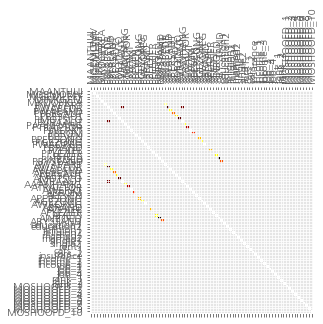

In [243]:
plt.figure(figsize=(100,100))
plt.matshow(ticdata[numerical_columns].corr()[ticdata[numerical_columns].corr()>0.7],cmap="hot")
plt.xticks(range(len(ticdata[numerical_columns].columns)),ticdata[numerical_columns].columns, rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.yticks(range(len(ticdata[numerical_columns].columns)),ticdata[numerical_columns].columns)


#### Random Forest 를 통한 변수 중요도 평가 
##### 최소한 0.005%이상인 변수들만 남긴다 max_depth=5로 설정해 최대한 많은 기회줌 (꼭 첫 분류기가 아니더라도 언제든 유용하면 쓰임)

In [244]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(max_depth=1,random_state=0,oob_score=True,n_estimators=1000) ###랜덤포레스트 1000개를 깊이 5가 되도록 추출 
clf.fit(ticdata.drop('CARAVAN',1),ticdata['CARAVAN'])
print(clf.oob_score_)
variable_importances=list(zip(ticdata.drop('CARAVAN',1).columns,np.round(clf.feature_importances_,2)))
feature_importance_matrix=pd.DataFrame(variable_importances).sort_values(by=1)
print(feature_importance_matrix)

0.7064846416382252
              0     1
0      MAANTHUI  0.00
32      AVRAAUT  0.00
33     AAANHANG  0.00
34     ATRACTOR  0.00
35       AWERKT  0.00
37       ALEVEN  0.00
38     APERSONG  0.00
77   MOSHOOFD_9  0.00
40      AWAOREG  0.00
42      AZEILPL  0.00
43     APLEZIER  0.00
44       AFIETS  0.00
45      AINBOED  0.00
46     ABYSTAND  0.00
48   education2  0.00
49    religion1  0.00
50    religion2  0.00
54      single2  0.00
61     income_3  0.00
62        job_1  0.00
65        job_4  0.00
68       rank_3  0.00
69   MOSHOOFD_1  0.00
71   MOSHOOFD_3  0.00
72   MOSHOOFD_4  0.00
74   MOSHOOFD_6  0.00
75   MOSHOOFD_7  0.00
76   MOSHOOFD_8  0.00
31      AMOTSCO  0.00
30      ABESAUT  0.00
..          ...   ...
27      AWABEDR  0.00
21      PZEILPL  0.00
15        PBROM  0.01
1       MGEMOMV  0.01
66       rank_1  0.01
64        job_3  0.01
57       cars_2  0.01
58    insurance  0.01
60     income_2  0.01
36        ABROM  0.01
73   MOSHOOFD_5  0.02
70   MOSHOOFD_2  0.02
67       rank

### 중요도가 0.01보다 큰 변수들만 뽑아준다

In [245]:
selected_variables=feature_importance_matrix[feature_importance_matrix.iloc[:,1]>=0.01][0]

In [246]:
selected_variables.shape ####35개가 남았다

(28,)

In [247]:
selected_variables

15          PBROM
1         MGEMOMV
66         rank_1
64          job_3
57         cars_2
58      insurance
60       income_2
36          ABROM
73     MOSHOOFD_5
70     MOSHOOFD_2
67         rank_2
63          job_2
41         ABRAND
53        single1
52       married2
78    MOSHOOFD_10
55          rent1
51       married1
3         MINKGEM
47     education1
59       income_1
56         cars_1
26        AWAPART
4        MKOOPKLA
29       APERSAUT
5         PWAPART
20         PBRAND
8        PPERSAUT
Name: 0, dtype: object

### 독립적인 변수들 남겨놓기 위해 남은 변수들로 공분산 검사

In [248]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vifdata=ticdata[selected_variables].copy()


In [249]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(vifdata.values, i) for i in range(vifdata.shape[1])]
vif["features"] = vifdata.columns

In [250]:
vif

,VIF Factor,features
0,3.434133,PBROM
1,9.934478,MGEMOMV
2,13.440081,rank_1
3,7.497014,job_3
4,10.679463,cars_2
5,5.561930,insurance
6,11.334685,income_2
7,3.464604,ABROM
8,1.439118,MOSHOOFD_5
9,1.655879,MOSHOOFD_2


In [251]:
delcolumns={}
while True:
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(vifdata.values, i) for i in range(vifdata.shape[1])]
    vif["features"] = vifdata.columns
    if vif.max()[0]>10:
        vifdata=vifdata.drop(vif[vif['VIF Factor']==vif['VIF Factor'].max()].features,1)
        delcolumns[vif[vif['VIF Factor']==vif['VIF Factor'].max()].features.values[0]]=vif[vif['VIF Factor']==vif['VIF Factor'].max()]['VIF Factor'].values[0]
    else:
        break

In [252]:
delcolumns ###사라진 특성들

{'AWAPART': 33.80084356848073,
 'income_1': 16.953913437498223,
 'education1': 13.334357596924699,
 'single1': 12.44758382731473,
 'MINKGEM': 12.254281825492022,
 'income_2': 10.800775830087982,
 'cars_2': 10.472816215970791}

In [253]:
vif ###남은값들의 vif지수를 보여준다

,VIF Factor,features
0,3.411410,PBROM
1,6.671478,MGEMOMV
2,8.909051,rank_1
3,6.247957,job_3
4,4.847936,insurance
5,3.454182,ABROM
6,1.384133,MOSHOOFD_5
7,1.613451,MOSHOOFD_2
8,5.545659,rank_2
9,8.751763,job_2


In [254]:
vifdata.columns

Index(['PBROM', 'MGEMOMV', 'rank_1', 'job_3', 'insurance', 'ABROM',
       'MOSHOOFD_5', 'MOSHOOFD_2', 'rank_2', 'job_2', 'ABRAND', 'married2',
       'MOSHOOFD_10', 'rent1', 'married1', 'cars_1', 'MKOOPKLA', 'APERSAUT',
       'PWAPART', 'PBRAND', 'PPERSAUT'],
      dtype='object')

In [255]:
clf= RandomForestClassifier(max_depth=1,random_state=0,oob_score=True,n_estimators=1000) ###랜덤포레스트 1000개를 깊이 5가 되도록 추출 
clf.fit(vifdata,ticdata['CARAVAN'])
print(clf.oob_score_)
variable_importances=list(zip(vifdata.columns,np.round(clf.feature_importances_,2)))
feature_importance_matrix=pd.DataFrame(variable_importances).sort_values(by=1)
print(feature_importance_matrix)

0.6962457337883959
              0     1
0         PBROM  0.00
2        rank_1  0.00
3         job_3  0.00
5         ABROM  0.00
12  MOSHOOFD_10  0.00
1       MGEMOMV  0.01
9         job_2  0.01
11     married2  0.01
4     insurance  0.02
6    MOSHOOFD_5  0.02
7    MOSHOOFD_2  0.02
8        rank_2  0.02
13        rent1  0.03
10       ABRAND  0.03
14     married1  0.05
15       cars_1  0.05
18      PWAPART  0.10
16     MKOOPKLA  0.11
19       PBRAND  0.14
17     APERSAUT  0.17
20     PPERSAUT  0.18


In [256]:
rf_var=feature_importance_matrix.iloc[:,0]

### AIC,BIC 규제기법을 통한 변수 선택 

C:\Users\jang\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jang\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


Text(0.5, 1.0, 'Information-criterion for model selection')

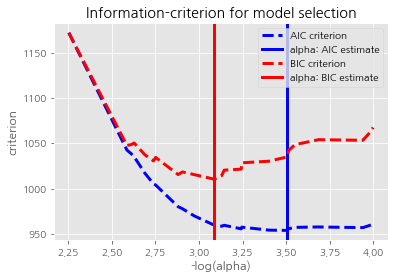

In [257]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

EPSILON = 1e-4
X = vifdata[rf_var].copy()
y = ticdata['CARAVAN']

rng = np.random.RandomState(42)

stscaler=StandardScaler() #### 정규화를 통해 회귀계수를 통해 정규화를
stscaler.fit(X)
X=stscaler.transform(X)

# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(X, y)
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection')

### 회귀 모형에서 aic 규제기법을 통해 구한 변수들을 aic 변수들로 저장한다

In [258]:
aic_var=vifdata[rf_var].columns[model_aic.coef_!=0]

In [259]:
print(pd.Series(dict(zip(vifdata[rf_var].columns,abs(model_aic.coef_)))).sort_values(ascending=False)) 

PPERSAUT       0.150990
PWAPART        0.053764
MOSHOOFD_5     0.039220
cars_1         0.035388
MOSHOOFD_10    0.033724
rent1          0.027027
ABROM          0.019995
married1       0.017679
MOSHOOFD_2     0.014854
married2       0.012536
job_2          0.010457
ABRAND         0.007201
MGEMOMV        0.006995
insurance      0.006193
PBRAND         0.005105
MKOOPKLA       0.002960
rank_2         0.000000
APERSAUT       0.000000
job_3          0.000000
rank_1         0.000000
PBROM          0.000000
dtype: float64


### 회귀 모형에서 bic 규제기법을 통해 구한 변수들을 aic 변수들로 저장한다

In [260]:
bic_var=vifdata[rf_var].columns[model_bic.coef_!=0]

In [261]:
print(pd.Series(dict(zip(vifdata[rf_var].columns,abs(model_bic.coef_)))).sort_values(ascending=False)) 

PPERSAUT       0.141821
PWAPART        0.044831
cars_1         0.028638
MOSHOOFD_5     0.024242
rent1          0.021253
MOSHOOFD_10    0.016569
MKOOPKLA       0.014054
married1       0.012507
MOSHOOFD_2     0.007839
ABROM          0.006663
rank_2         0.000000
APERSAUT       0.000000
ABRAND         0.000000
insurance      0.000000
married2       0.000000
job_2          0.000000
MGEMOMV        0.000000
PBRAND         0.000000
job_3          0.000000
rank_1         0.000000
PBROM          0.000000
dtype: float64


In [262]:
aic_var

Index(['ABROM', 'MOSHOOFD_10', 'MGEMOMV', 'job_2', 'married2', 'insurance',
       'MOSHOOFD_5', 'MOSHOOFD_2', 'rent1', 'ABRAND', 'married1', 'cars_1',
       'PWAPART', 'MKOOPKLA', 'PBRAND', 'PPERSAUT'],
      dtype='object')

In [263]:
bic_var

Index(['ABROM', 'MOSHOOFD_10', 'MOSHOOFD_5', 'MOSHOOFD_2', 'rent1', 'married1',
       'cars_1', 'PWAPART', 'MKOOPKLA', 'PPERSAUT'],
      dtype='object')

# 예측 모델 만들기 시작

### 예측모형을 위학 패키지들 imort

In [264]:
from sklearn.model_selection import train_test_split 
import sklearn
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV

### 사용할 변수들

In [265]:
variable=aic_var
print("사용할 변수들")
print(variable)
print("사용할 변수개수:",len(variable))

사용할 변수들
Index(['ABROM', 'MOSHOOFD_10', 'MGEMOMV', 'job_2', 'married2', 'insurance',
       'MOSHOOFD_5', 'MOSHOOFD_2', 'rent1', 'ABRAND', 'married1', 'cars_1',
       'PWAPART', 'MKOOPKLA', 'PBRAND', 'PPERSAUT'],
      dtype='object')
사용할 변수개수: 16


### Undersampling 을 통해 뽑은 데이터 반응변수 비율

In [266]:
ticdata['CARAVAN'].value_counts()

1    586
0    586
Name: CARAVAN, dtype: int64

#### Train Set: VAlidation set: Test set 비율이 0.7: 0,15:0.15 가 되도록 데이터를 나눠준다

In [267]:
###dataset=allticdata
dataset=ticdata
###var=important_features
var=variable


X = (dataset[dataset[var].columns.values]) ####사용할 데이터만 따로 뗴어서 X로 저장
y = np.array(dataset['CARAVAN']) ####반응변수 "CARAVAN"값을 y로저장

print('\n')
print('X and y Input Data:   ', X.shape, y.shape)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0) ###train set 비율이 0.7 test set 비율이 0.3

print('Training Set Shape:   ', X_train.shape, y_train.shape)

print('Validation Set Shape: ', X_val.shape,y_val.shape)




X and y Input Data:    (1172, 16) (1172,)
Training Set Shape:    (820, 16) (820,)
Validation Set Shape:  (352, 16) (352,)


In [268]:
print(sum(y_train==0),sum(y_train==1))

403 417


#### Train Set: VAlidation set: Test set 의 sample_weight 를 담아두는 array 를 만들어준다

In [269]:
def weight_array(y):
    a=[]
    for i in range(len(y)):
        if np.hstack(y)[i]==0:
            a.append(sampleweight_0)
        else:
            a.append(sampleweight_1)
    return a

In [270]:
train_sampleweight=weight_array(y_train)
val_sampleweight=weight_array(y_val)

### 이익도표를 만들기 위한 함수를 만들어준다

In [271]:
def calc_lift(x,y,clf,bins=10): 
     #Actual Value of y
    y_actual = np.hstack(y)
    #Predicted Probability that y = 1 
    y_prob = clf.predict_proba(x) 
    #Predicted Value of Y 
    y_pred = clf.predict(x) 
    cols = ['ACTUAL','PROB_POSITIVE','PREDICTED'] 
    data = [y_actual,y_prob[:,1],y_pred] 
    df = pd.DataFrame(dict(zip(cols,data))) 
    #Observations where y=1 
    total_positive_n = df['ACTUAL'].sum() 
    #Total Observations 
    total_n = df.index.size 
    natural_positive_prob = total_positive_n/float(total_n) 
    df['상위구간'] = pd.qcut(df['PROB_POSITIVE'],bins,labels=False, duplicates='drop') 
    pos_group_df = df.groupby('상위구간')
    #Percentage of Observations in each Bin where y = 1  
    actual=pos_group_df['ACTUAL'].sum().sort_index(ascending=False)
    bin_count=pos_group_df['ACTUAL'].count().sort_index(ascending=False)
    cumsum=np.cumsum(bin_count)
    cumsum_percentage=np.cumsum(bin_count)/np.sum(bin_count)
    lift_positive = pos_group_df['ACTUAL'].sum().sort_index(ascending=False)/pos_group_df['ACTUAL'].count().sort_index(ascending=False)
    cum_active=np.cumsum(pos_group_df['ACTUAL'].sum().sort_index(ascending=False))/np.cumsum(pos_group_df['ACTUAL'].count().sort_index(ascending=False))
    cum_lift_positive=np.cumsum(pos_group_df['ACTUAL'].sum().sort_index(ascending=False))/np.cumsum(pos_group_df['ACTUAL'].count().sort_index(ascending=False))
    cum_lift_positive=cum_lift_positive/natural_positive_prob 
    lift_index_positive = (lift_positive/natural_positive_prob)
    
    #Consolidate Results into Output Dataframe 
    lift_df = pd.DataFrame({ '구간 관측치 개수':bin_count
                                ,'구간 활성화 비율(%)':lift_positive*100 , 
                                   '구간 LIFT':lift_index_positive, 
                                 '구간 실제 구매한 사람 수':actual,
                                 '누적 관측치 개수':np.round(cumsum,1),
                                '누적 메일 보낸 비율':np.round(cumsum_percentage,1),
                                '누적 활성화 비율 %':np.round(cum_active,2),
                            '누적 실제 구매한 사람수':np.cumsum(actual),
                            '누적 lift (%)':cum_lift_positive}) 
    lift_df.index=[1,2,3,4,5,6,7,8,9,10]
    lift_df.index.name='구간'
    return lift_df 


## Logistic Regression 모델 적합

In [272]:
clf_Log = LogisticRegression(max_iter=100,random_state=10)
parameters={'solver':['liblinear']}
clf_Log=GridSearchCV(clf_Log,parameters,cv=10)
clf_Log=clf_Log.fit(X_train, y_train,sample_weight=train_sampleweight).best_estimator_
y_score = clf_Log.decision_function(X_val)
y_pred_Log = clf_Log.predict(X_val)


#### 잔차플롯

In [273]:
residual=y_val-y_score

Text(0, 0.5, '잔차값')

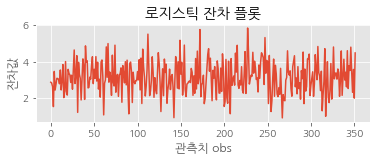

In [274]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(len(residual)),residual)
plt.title("로지스틱 잔차 플롯")
plt.xlabel("관측치 obs")
plt.ylabel("잔차값")

Text(0, 0.5, '빈도값')

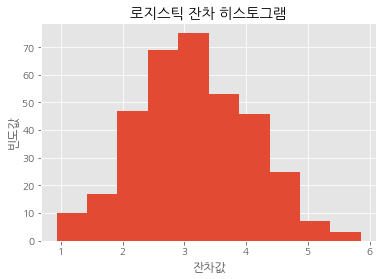

In [275]:
plt.hist(residual)
plt.title("로지스틱 잔차 히스토그램")###정규분포를 따르는것처럼 보인다 
plt.xlabel("잔차값")
plt.ylabel("빈도값")

Text(0, 0.5, 'TRUE 양성 비율')

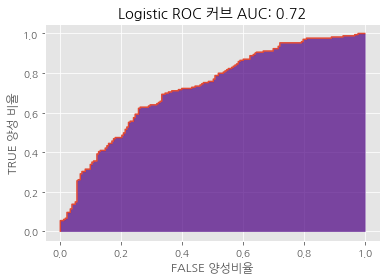

In [276]:
fpr, tpr, thresholds = roc_curve(y_val,y_score,sample_weight=val_sampleweight)
auc=np.round(roc_auc_score(y_val,y_score,sample_weight=val_sampleweight),2)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,color='indigo',alpha=0.7)
plt.title("Logistic ROC 커브 AUC: %s" %auc)
plt.xlabel("FALSE 양성비율")
plt.ylabel("TRUE 양성 비율")

Text(0, 0.5, '정밀성 %')

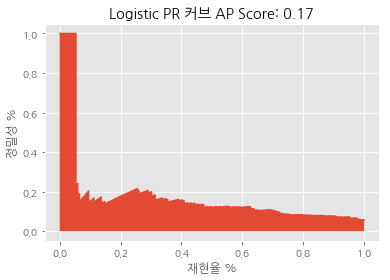

In [277]:
precision, recall, thresholds = precision_recall_curve(y_val, y_score,sample_weight=val_sampleweight)
ap_score_Log=np.round(average_precision_score(y_val, y_score,sample_weight=val_sampleweight),2)
plt.plot(recall,precision)
plt.fill_between(recall,precision)
plt.title("Logistic PR 커브 AP Score: %s"%ap_score_Log)
plt.xlabel("재현율 %")
plt.ylabel("정밀성 %")

In [278]:
calc_lift(X_train,y_train,clf_Log,bins=10)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 구매한 사람 수,누적 관측치 개수,누적 메일 보낸 비율,누적 활성화 비율 %,누적 실제 구매한 사람수,누적 lift (%)
구간,,,,,,,,,
1,82,84.146341,1.654676,69,82,0.1,0.84,69,1.654676
2,81,75.308642,1.480889,61,163,0.2,0.80,130,1.568316
3,83,71.084337,1.397822,59,246,0.3,0.77,189,1.510791
4,82,60.975610,1.199041,50,328,0.4,0.73,239,1.432854
5,82,63.414634,1.247002,52,410,0.5,0.71,291,1.395683
6,82,48.780488,0.959233,40,492,0.6,0.67,331,1.322942
7,82,35.365854,0.695444,29,574,0.7,0.63,360,1.233299
8,82,36.585366,0.719424,30,656,0.8,0.59,390,1.169065
9,82,26.829268,0.527578,22,738,0.9,0.56,412,1.097788


In [279]:
calc_lift(X_val,y_val,clf_Log,bins=10)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 구매한 사람 수,누적 관측치 개수,누적 메일 보낸 비율,누적 활성화 비율 %,누적 실제 구매한 사람수,누적 lift (%)
구간,,,,,,,,,
1,36,72.222222,1.504274,26,36,0.1,0.72,26,1.504274
2,35,77.142857,1.606762,27,71,0.2,0.75,53,1.554796
3,35,62.857143,1.309214,22,106,0.3,0.71,75,1.473708
4,35,62.857143,1.309214,22,141,0.4,0.69,97,1.432876
5,35,51.428571,1.071175,18,176,0.5,0.65,115,1.360947
6,35,31.428571,0.654607,11,211,0.6,0.60,126,1.243781
7,35,42.857143,0.892646,15,246,0.7,0.57,141,1.193823
8,35,37.142857,0.773626,13,281,0.8,0.55,154,1.141485
9,35,31.428571,0.654607,11,316,0.9,0.52,165,1.087559


### NAIVE BAYES CLASSIFIER 분류기

In [280]:
clf_NB = BernoulliNB()
clf_NB.fit(X_train, y_train,sample_weight=train_sampleweight)
y_pred_NB = clf_NB.predict(X_val)

Text(0, 0.5, 'TRUE 양성 비율')

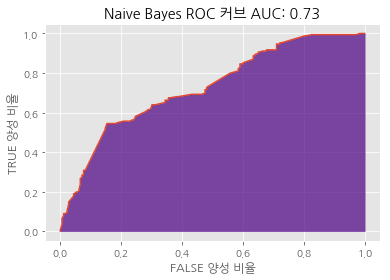

In [281]:
y_score = clf_NB.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
auc=np.round(roc_auc_score(y_val,y_score,sample_weight=val_sampleweight),2)
fpr, tpr, thresholds = roc_curve(y_val,y_score)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,color='indigo',alpha=0.7)
plt.title("Naive Bayes ROC 커브 AUC: %s"%auc)
plt.xlabel("FALSE 양성 비율")
plt.ylabel("TRUE 양성 비율")

Text(0, 0.5, '정밀성 %')

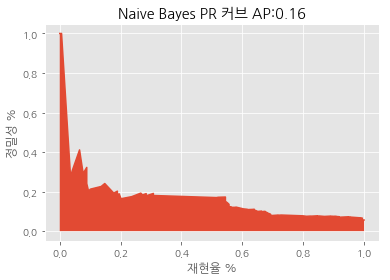

In [282]:
y_score = clf_NB.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
precision, recall, thresholds = precision_recall_curve(y_val, y_score,sample_weight=val_sampleweight)
ap_score_NB=np.round(average_precision_score(y_val, y_score,sample_weight=val_sampleweight),2)
plt.plot(recall,precision)
plt.fill_between(recall,precision)
plt.title("Naive Bayes PR 커브 AP:%s"%ap_score_NB)
plt.xlabel("재현율 %")
plt.ylabel("정밀성 %")

In [188]:
calc_lift(X_train,y_train,clf_NB,bins=10)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 구매한 사람 수,누적 관측치 개수,누적 메일 보낸 비율,누적 활성화 비율 %,누적 실제 구매한 사람수,누적 lift (%)
구간,,,,,,,,,
1,81,79.012346,1.553720,64,81,0.1,0.79,64,1.553720
2,83,77.108434,1.516281,64,164,0.2,0.78,128,1.534772
3,12,58.333333,1.147082,7,176,0.2,0.77,135,1.508339
4,149,65.771812,1.293355,98,325,0.4,0.72,233,1.409777
5,85,58.823529,1.156722,50,410,0.5,0.69,283,1.357314
6,82,40.243902,0.791367,33,492,0.6,0.64,316,1.262990
7,72,50.000000,0.983213,36,564,0.7,0.62,352,1.227274
8,89,25.842697,0.508178,23,653,0.8,0.57,375,1.129265
9,49,20.408163,0.401312,10,702,0.9,0.55,385,1.078453


In [189]:
calc_lift(X_val,y_val,clf_Log,bins=10)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 구매한 사람 수,누적 관측치 개수,누적 메일 보낸 비율,누적 활성화 비율 %,누적 실제 구매한 사람수,누적 lift (%)
구간,,,,,,,,,
1,36,72.222222,1.504274,26,36,0.1,0.72,26,1.504274
2,35,77.142857,1.606762,27,71,0.2,0.75,53,1.554796
3,35,62.857143,1.309214,22,106,0.3,0.71,75,1.473708
4,35,62.857143,1.309214,22,141,0.4,0.69,97,1.432876
5,35,51.428571,1.071175,18,176,0.5,0.65,115,1.360947
6,35,31.428571,0.654607,11,211,0.6,0.60,126,1.243781
7,35,42.857143,0.892646,15,246,0.7,0.57,141,1.193823
8,35,37.142857,0.773626,13,281,0.8,0.55,154,1.141485
9,35,31.428571,0.654607,11,316,0.9,0.52,165,1.087559


#### 신경망 모델 적합

In [283]:
clf_MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100))

clf_MLP.fit(X_train, y_train)
y_pred_MLP = clf_MLP.predict(X_val)

C:\Users\jang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'TRUE 양성 비율')

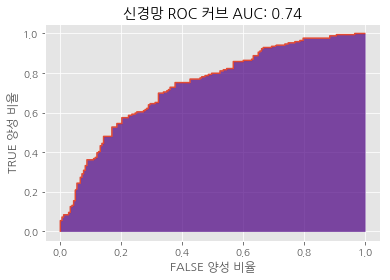

In [284]:
y_score = clf_MLP.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
fpr, tpr, thresholds = roc_curve(y_val,y_score)
auc=np.round(roc_auc_score(y_val,y_score,sample_weight=val_sampleweight),2)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,color='indigo',alpha=0.7)
plt.title("신경망 ROC 커브 AUC: %s"%auc)
plt.xlabel("FALSE 양성 비율")
plt.ylabel("TRUE 양성 비율")

Text(0, 0.5, '정밀성 %')

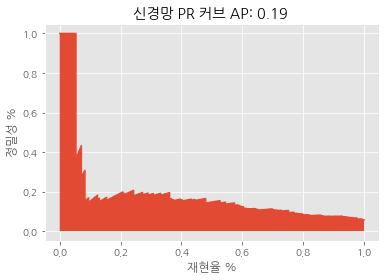

In [285]:
y_score = clf_MLP.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
precision, recall, thresholds = precision_recall_curve(y_val, y_score,sample_weight=val_sampleweight)
ap_score_MLP=np.round(average_precision_score(y_val, y_score,sample_weight=val_sampleweight),2)
plt.plot(recall,precision)
plt.fill_between(recall,precision)
plt.title("신경망 PR 커브 AP: %s "%ap_score_MLP)
plt.xlabel("재현율 %")
plt.ylabel("정밀성 %")

In [286]:
calc_lift(X_train,y_train,clf_MLP)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 구매한 사람 수,누적 관측치 개수,누적 메일 보낸 비율,누적 활성화 비율 %,누적 실제 구매한 사람수,누적 lift (%)
구간,,,,,,,,,
1,82,91.463415,1.798561,75,82,0.1,0.91,75,1.798561
2,82,79.268293,1.558753,65,164,0.2,0.85,140,1.678657
3,82,64.634146,1.270983,53,246,0.3,0.78,193,1.542766
4,82,69.512195,1.366906,57,328,0.4,0.76,250,1.498801
5,82,57.317073,1.127098,47,410,0.5,0.72,297,1.424460
6,82,54.878049,1.079137,45,492,0.6,0.70,342,1.366906
7,82,37.804878,0.743405,31,574,0.7,0.65,373,1.277835
8,82,31.707317,0.623501,26,656,0.8,0.61,399,1.196043
9,82,18.292683,0.359712,15,738,0.9,0.56,414,1.103118


In [287]:
calc_lift(X_val,y_val,clf_MLP)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 구매한 사람 수,누적 관측치 개수,누적 메일 보낸 비율,누적 활성화 비율 %,누적 실제 구매한 사람수,누적 lift (%)
구간,,,,,,,,,
1,36,75.000000,1.562130,27,36,0.1,0.75,27,1.562130
2,35,82.857143,1.725782,29,71,0.2,0.79,56,1.642804
3,35,68.571429,1.428233,24,106,0.3,0.75,80,1.571955
4,35,54.285714,1.130685,19,141,0.4,0.70,99,1.462420
5,35,51.428571,1.071175,18,176,0.5,0.66,117,1.384615
6,35,37.142857,0.773626,13,211,0.6,0.62,130,1.283266
7,35,34.285714,0.714117,12,246,0.7,0.58,142,1.202290
8,35,42.857143,0.892646,15,281,0.8,0.56,157,1.163722
9,35,22.857143,0.476078,8,316,0.9,0.52,165,1.087559


## 랜덤포레스트

In [288]:
clf_RF = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=1)
clf_RF.fit(X_train, y_train,sample_weight=train_sampleweight)
y_pred_RF = clf_RF.predict(X_val)

Text(0, 0.5, 'TRUE 양성 비율')

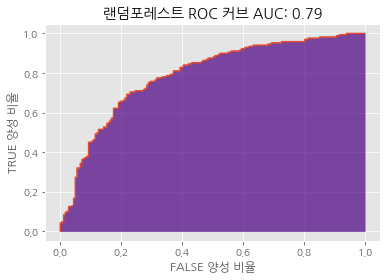

In [289]:
y_score = clf_RF.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
fpr, tpr, thresholds = roc_curve(y_val,y_score)
auc=np.round(roc_auc_score(y_val,y_score,sample_weight=val_sampleweight),2)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,color='indigo',alpha=0.7)
plt.title("랜덤포레스트 ROC 커브 AUC: %s"%auc)
plt.xlabel("FALSE 양성 비율")
plt.ylabel("TRUE 양성 비율")

Text(0, 0.5, '정밀성 %')

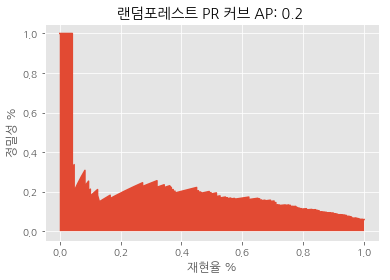

In [290]:
y_score = clf_RF.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
precision, recall, thresholds = precision_recall_curve(y_val, y_score,sample_weight=val_sampleweight)
ap_score_RF=np.round(average_precision_score(y_val, y_score,sample_weight=val_sampleweight),2)
plt.plot(recall,precision)
plt.fill_between(recall,precision)
plt.title("랜덤포레스트 PR 커브 AP: %s "%ap_score_RF)
plt.xlabel("재현율 %")
plt.ylabel("정밀성 %")

In [291]:
calc_lift(X_train,y_train,clf_RF)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 구매한 사람 수,누적 관측치 개수,누적 메일 보낸 비율,누적 활성화 비율 %,누적 실제 구매한 사람수,누적 lift (%)
구간,,,,,,,,,
1,82,89.024390,1.750600,73,82,0.1,0.89,73,1.750600
2,82,70.731707,1.390887,58,164,0.2,0.80,131,1.570743
3,82,71.951220,1.414868,59,246,0.3,0.77,190,1.518785
4,82,62.195122,1.223022,51,328,0.4,0.73,241,1.444844
5,82,53.658537,1.055156,44,410,0.5,0.70,285,1.366906
6,82,56.097561,1.103118,46,492,0.6,0.67,331,1.322942
7,82,40.243902,0.791367,33,574,0.7,0.63,364,1.247002
8,82,19.512195,0.383693,16,656,0.8,0.58,380,1.139089
9,82,21.951220,0.431655,18,738,0.9,0.54,398,1.060485


In [292]:
calc_lift(X_val,y_val,clf_RF)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 구매한 사람 수,누적 관측치 개수,누적 메일 보낸 비율,누적 활성화 비율 %,누적 실제 구매한 사람수,누적 lift (%)
구간,,,,,,,,,
1,36,77.777778,1.619987,28,36,0.1,0.78,28,1.619987
2,35,85.714286,1.785292,30,71,0.2,0.82,58,1.701475
3,35,74.285714,1.547253,26,106,0.3,0.79,84,1.650553
4,35,62.857143,1.309214,22,141,0.4,0.75,106,1.565823
5,35,51.428571,1.071175,18,176,0.5,0.70,124,1.467456
6,35,42.857143,0.892646,15,211,0.6,0.66,139,1.372108
7,35,34.285714,0.714117,12,246,0.7,0.61,151,1.278491
8,35,22.857143,0.476078,8,281,0.8,0.57,159,1.178547
9,35,17.142857,0.357058,6,316,0.9,0.52,165,1.087559


## 아다부스트

In [293]:
clf_AdaB = AdaBoostClassifier(n_estimators=100)
clf_AdaB.fit(X_train, y_train,sample_weight=train_sampleweight)
y_pred_AdaB = clf_AdaB.predict(X_val)

Text(0, 0.5, 'TRUE 양성 비율')

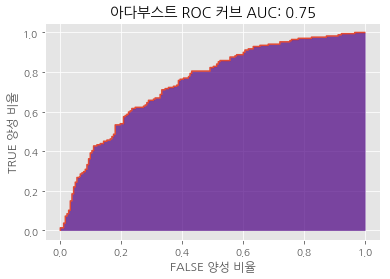

In [294]:
y_score = clf_AdaB.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
fpr, tpr, thresholds = roc_curve(y_val,y_score)
auc=np.round(roc_auc_score(y_val,y_score,sample_weight=val_sampleweight),2)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,color='indigo',alpha=0.7)
plt.title("아다부스트 ROC 커브 AUC: %s"%auc)
plt.xlabel("FALSE 양성 비율")
plt.ylabel("TRUE 양성 비율")

Text(0, 0.5, '정밀성 %')

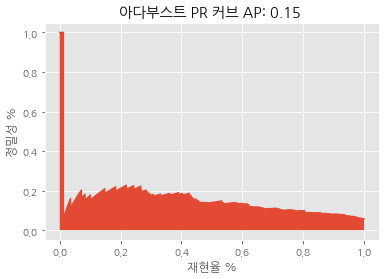

In [295]:
y_score = clf_AdaB.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
precision, recall, thresholds = precision_recall_curve(y_val, y_score,sample_weight=val_sampleweight)
ap_score_ADA=np.round(average_precision_score(y_val, y_score,sample_weight=val_sampleweight),2)
plt.plot(recall,precision)
plt.fill_between(recall,precision)
plt.title("아다부스트 PR 커브 AP: %s "%ap_score_ADA)
plt.xlabel("재현율 %")
plt.ylabel("정밀성 %")

In [296]:
calc_lift(X_train,y_train,clf_AdaB)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 구매한 사람 수,누적 관측치 개수,누적 메일 보낸 비율,누적 활성화 비율 %,누적 실제 구매한 사람수,누적 lift (%)
구간,,,,,,,,,
1,82,92.682927,1.822542,76,82,0.1,0.93,76,1.822542
2,82,82.926829,1.630695,68,164,0.2,0.88,144,1.726619
3,82,71.951220,1.414868,59,246,0.3,0.83,203,1.622702
4,82,70.731707,1.390887,58,328,0.4,0.80,261,1.564748
5,82,58.536585,1.151079,48,410,0.5,0.75,309,1.482014
6,82,53.658537,1.055156,44,492,0.6,0.72,353,1.410871
7,82,40.243902,0.791367,33,574,0.7,0.67,386,1.322371
8,82,23.170732,0.455635,19,656,0.8,0.62,405,1.214029
9,82,14.634146,0.287770,12,738,0.9,0.57,417,1.111111


In [297]:
calc_lift(X_val,y_val,clf_AdaB)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 구매한 사람 수,누적 관측치 개수,누적 메일 보낸 비율,누적 활성화 비율 %,누적 실제 구매한 사람수,누적 lift (%)
구간,,,,,,,,,
1,36,80.555556,1.677844,29,36,0.1,0.81,29,1.677844
2,35,74.285714,1.547253,26,71,0.2,0.77,55,1.613468
3,35,62.857143,1.309214,22,106,0.3,0.73,77,1.513007
4,35,65.714286,1.368724,23,141,0.4,0.71,100,1.477192
5,35,45.714286,0.952156,16,176,0.5,0.66,116,1.372781
6,35,48.571429,1.011665,17,211,0.6,0.63,133,1.312880
7,35,34.285714,0.714117,12,246,0.7,0.59,145,1.227690
8,35,37.142857,0.773626,13,281,0.8,0.56,158,1.171134
9,35,20.000000,0.416568,7,316,0.9,0.52,165,1.087559


## 그래디언트 부스트

In [298]:
clf_GB = GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, random_state=42)
clf_GB.fit(X_train, y_train,sample_weight=train_sampleweight)
y_pred_GB = clf_GB.predict(X_val)

Text(0, 0.5, 'TRUE 양성 비율')

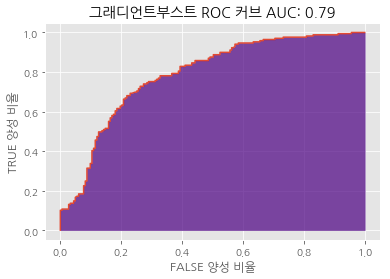

In [299]:
y_score = clf_GB.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
fpr, tpr, thresholds = roc_curve(y_val,y_score)
auc=np.round(roc_auc_score(y_val,y_score,sample_weight=val_sampleweight),2)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,color='indigo',alpha=0.7)
plt.title("그래디언트부스트 ROC 커브 AUC: %s"%auc)
plt.xlabel("FALSE 양성 비율")
plt.ylabel("TRUE 양성 비율")

Text(0, 0.5, '정밀성 %')

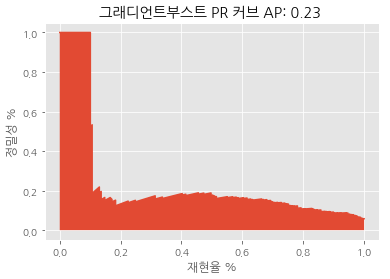

In [300]:
y_score = clf_GB.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
precision, recall, thresholds = precision_recall_curve(y_val, y_score,sample_weight=val_sampleweight)
ap_score_GB=np.round(average_precision_score(y_val, y_score,sample_weight=val_sampleweight),2)
plt.plot(recall,precision)
plt.fill_between(recall,precision)
plt.title("그래디언트부스트 PR 커브 AP: %s "%ap_score_GB)
plt.xlabel("재현율 %")
plt.ylabel("정밀성 %")

In [301]:
calc_lift(X_train,y_train,clf_GB)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 구매한 사람 수,누적 관측치 개수,누적 메일 보낸 비율,누적 활성화 비율 %,누적 실제 구매한 사람수,누적 lift (%)
구간,,,,,,,,,
1,82,100.000000,1.966427,82,82,0.1,1.00,82,1.966427
2,81,93.827160,1.845042,76,163,0.2,0.97,158,1.906107
3,83,81.927711,1.611049,68,246,0.3,0.92,226,1.806555
4,82,70.731707,1.390887,58,328,0.4,0.87,284,1.702638
5,82,56.097561,1.103118,46,410,0.5,0.80,330,1.582734
6,82,34.146341,0.671463,28,492,0.6,0.73,358,1.430855
7,82,30.487805,0.599520,25,574,0.7,0.67,383,1.312093
8,82,30.487805,0.599520,25,656,0.8,0.62,408,1.223022
9,82,9.756098,0.191847,8,738,0.9,0.56,416,1.108447


In [302]:
calc_lift(X_val,y_val,clf_GB)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 구매한 사람 수,누적 관측치 개수,누적 메일 보낸 비율,누적 활성화 비율 %,누적 실제 구매한 사람수,누적 lift (%)
구간,,,,,,,,,
1,36,75.000000,1.562130,27,36,0.1,0.75,27,1.562130
2,35,74.285714,1.547253,26,71,0.2,0.75,53,1.554796
3,35,85.714286,1.785292,30,106,0.3,0.78,83,1.630903
4,35,62.857143,1.309214,22,141,0.4,0.74,105,1.551051
5,34,58.823529,1.225200,20,175,0.5,0.71,125,1.487743
6,36,38.888889,0.809993,14,211,0.6,0.66,139,1.372108
7,35,31.428571,0.654607,11,246,0.7,0.61,150,1.270025
8,35,31.428571,0.654607,11,281,0.8,0.57,161,1.193371
9,35,14.285714,0.297549,5,316,0.9,0.53,166,1.094150


### SVM (서포트 벡터 머신)

In [183]:
clf_SVM = SVC(C=5,probability=True)
clf_SVM.fit(X_train, y_train,sample_weight=train_sampleweight)
y_pred_SVM = clf_SVM.predict(X_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0, 0.5, 'TRUE Positive rate')

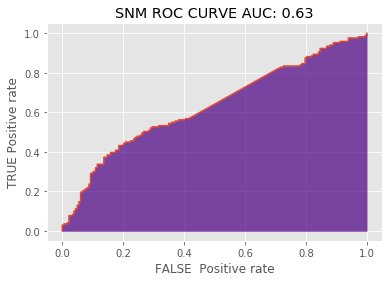

In [186]:
y_score = clf_SVM.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
fpr, tpr, thresholds = roc_curve(y_val,y_score)
auc=np.round(roc_auc_score(y_val,y_score,sample_weight=val_sampleweight),2)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,color='indigo',alpha=0.7)
plt.title("SNM ROC CURVE AUC: %s"%auc)
plt.xlabel("FALSE  Positive rate")
plt.ylabel("TRUE Positive rate")

Text(0, 0.5, 'PRECISION %')

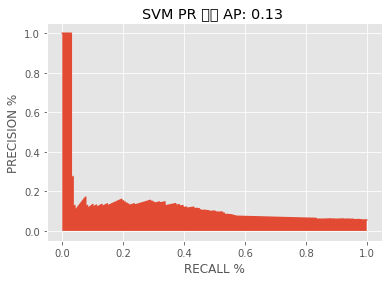

In [187]:
y_score = clf_SVM.predict_proba(X_val)
y_score=np.array(pd.DataFrame(y_score)[1])
precision, recall, thresholds = precision_recall_curve(y_val, y_score,sample_weight=val_sampleweight)
ap_score_SVM=np.round(average_precision_score(y_val, y_score,sample_weight=val_sampleweight),2)
plt.plot(recall,precision)
plt.fill_between(recall,precision)
plt.title("SVM PR 커브 AP: %s "%ap_score_SVM)
plt.xlabel("RECALL %")
plt.ylabel("PRECISION %")

In [306]:
calc_lift(X_train,y_train,clf_SVM)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 구매한 사람 수,누적 관측치 개수,누적 메일 보낸 비율,누적 활성화 비율 %,누적 실제 구매한 사람수,누적 lift (%)
구간,,,,,,,,,
1,81,97.530864,1.917873,79,81,0.1,0.98,79,1.917873
2,83,77.108434,1.516281,64,164,0.2,0.87,143,1.714628
3,82,50.000000,0.983213,41,246,0.3,0.75,184,1.470823
4,82,43.902439,0.863309,36,328,0.4,0.67,220,1.318945
5,82,51.219512,1.007194,42,410,0.5,0.64,262,1.256595
6,21,42.857143,0.842754,9,431,0.5,0.63,271,1.236431
7,143,44.755245,0.880079,64,574,0.7,0.58,335,1.147653
8,82,37.804878,0.743405,31,656,0.8,0.56,366,1.097122
9,82,31.707317,0.623501,26,738,0.9,0.53,392,1.044498


In [307]:
calc_lift(X_val,y_val,clf_SVM)

,구간 관측치 개수,구간 활성화 비율(%),구간 LIFT,구간 실제 구매한 사람 수,누적 관측치 개수,누적 메일 보낸 비율,누적 활성화 비율 %,누적 실제 구매한 사람수,누적 lift (%)
구간,,,,,,,,,
1,36,77.777778,1.619987,28,36,0.1,0.78,28,1.619987
2,35,68.571429,1.428233,24,71,0.2,0.73,52,1.525460
3,35,37.142857,0.773626,13,106,0.3,0.61,65,1.277213
4,35,45.714286,0.952156,16,141,0.4,0.57,81,1.196525
5,35,60.000000,1.249704,21,176,0.5,0.58,102,1.207101
6,12,0.000000,0.000000,0,188,0.5,0.54,102,1.130052
7,58,46.551724,0.969598,27,246,0.7,0.52,129,1.092221
8,35,40.000000,0.833136,14,281,0.8,0.51,143,1.059951
9,35,40.000000,0.833136,14,316,0.9,0.50,157,1.034829


### ROC curves should be used when there are roughly equal numbers of observations for each class.

#### Precision-Recall curves should be used when there is a moderate to large class imbalance.

#### However, ROC curves can present an overly optimistic view of an algorithm’s performance if there is a large skew in the class distribution. […] Precision-Recall (PR) curves, often used in Information Retrieval , have been cited as an alternative to ROC curves for tasks with a large skew in the class distribution.

### 우리는 모형평가를 할 때 ROC curve 대신에 PR curve를 사용한 점수를 쓸것이다. 불균형 데이터의 경우에 더 많은 정보를 담고 있음

In [308]:
print('     모델들의 Validation AP Score     ')
print('--------------------------------')
print('Naive Bayes의                     AP  Score: %s '%ap_score_NB )
print('Neural Network의                  AP  Score: %s '%ap_score_MLP )
print('Logistic Regression의             AP  Score: %s '%ap_score_Log )
print('Random Forest의                   AP  Score: %s '%ap_score_RF )
print('AdaBoost의                        AP  Score: %s '%ap_score_ADA )
print('GradientBoost의                   AP  Score: %s '%ap_score_GB )               
print('Support Vector Machine의          AP  Score: %s '%ap_score_SVM )

     모델들의 Validation AP Score     
--------------------------------
Naive Bayes의                     AP  Score: 0.16 
Neural Network의                  AP  Score: 0.19 
Logistic Regression의             AP  Score: 0.17 
Random Forest의                   AP  Score: 0.2 
AdaBoost의                        AP  Score: 0.15 
GradientBoost의                   AP  Score: 0.23 
Support Vector Machine의          AP  Score: 0.12 


### 최종 모형 RandomForest , Logistic 모형

In [309]:
print("RandomForest 변수 중요도")
variable_importances=list(zip(X_train.columns,np.round(clf_RF.feature_importances_,2)))
feature_importance_matrix=pd.DataFrame(variable_importances).sort_values(by=1)
print(feature_importance_matrix)

RandomForest 변수 중요도
              0     1
0         ABROM  0.00
1   MOSHOOFD_10  0.00
6    MOSHOOFD_5  0.00
9        ABRAND  0.00
2       MGEMOMV  0.01
4      married2  0.02
5     insurance  0.02
3         job_2  0.04
8         rent1  0.05
7    MOSHOOFD_2  0.06
10     married1  0.06
11       cars_1  0.09
14       PBRAND  0.11
12      PWAPART  0.12
13     MKOOPKLA  0.16
15     PPERSAUT  0.26


In [310]:
print("Logistic 모형 계수")
print(pd.DataFrame(zip(X_train.columns,np.hstack(clf_Log.coef_))).sort_values([1]))

Logistic 모형 계수
              0         1
0         ABROM -1.546908
1   MOSHOOFD_10 -1.453082
11       cars_1 -1.148155
10     married1 -1.020027
6    MOSHOOFD_5 -0.896549
4      married2 -0.833053
3         job_2 -0.751103
8         rent1 -0.520202
14       PBRAND -0.516569
2       MGEMOMV -0.119983
13     MKOOPKLA  0.071469
9        ABRAND  0.085347
5     insurance  0.135476
7    MOSHOOFD_2  0.317492
12      PWAPART  1.130559
15     PPERSAUT  5.159477
